<b>Задание</b>
1. Восстановите пропуски в столбце kitchen_area. 
2. Добавьте информацию из датасета region.csv.
3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.
4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
5. Когда выгодно покупать/продавать объект недвижимости?
6. Создайте модель прогноза цены объекта недвижимости.


Импортируем необходимые библиотеки и загружаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

C:\Users\1\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('realty_18_21.csv', parse_dates=['date'])
df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1


Посмотрим информацию о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 417.9 MB


Типы данных в норме, проверим данные на наличие пропусков

In [4]:
df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

Есть пропуски в столбце с площадью кухни, заполним их далее

Проверим данные на наличие ошибок

In [5]:
df.query('price <= 0')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,5520,1,13,22,1,38.92,NaN,11
43822,-1633967296,2018-09-14,5520,1,14,22,1,38.92,17.26,11
179212,0,2018-10-01,6817,3,5,10,3,104.00,15.00,1
199895,-429242296,2018-10-04,9654,2,5,25,2,57.27,9.31,11
208483,-1744967296,2018-10-06,9654,3,4,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...
5382188,-2041757296,2021-04-23,2604,3,2,4,1,41.08,9.31,11
5382595,-1794967296,2021-04-23,81,1,4,5,2,56.00,9.00,1
5398253,-1494967296,2021-04-26,2843,3,3,3,1,45.00,17.00,11
5419426,-2094967296,2021-04-27,3991,3,14,19,1,30.00,8.00,1


In [6]:
df = df.query('price > 0')

In [7]:
df.shape

(5476618, 10)

In [8]:
df.query('level > levels')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
26283,1850000,2018-09-12,3870,3,17,13,1,37.00,10.00,1
35903,1100000,2018-09-13,9654,3,4,1,1,30.00,8.00,1
117969,700000,2018-09-22,2722,3,2,1,2,40.00,11.00,1
148751,3200000,2018-09-27,11171,2,4,3,1,31.00,10.00,1
164863,1050000,2018-09-28,2843,4,2,1,2,54.00,10.00,1
...,...,...,...,...,...,...,...,...,...,...
4942329,4750000,2021-01-19,2843,4,11,10,2,54.00,6.00,1
5175158,6984180,2021-03-18,81,3,4,3,2,57.80,11.68,11
5175162,7164620,2021-03-18,81,3,4,3,2,78.84,11.68,11
5175971,4136487,2021-03-18,81,3,4,3,1,48.40,9.01,11


In [9]:
df = df.query('level <= levels')

In [10]:
df.shape

(5475546, 10)

In [11]:
df.query('rooms == -2')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
62764,24912000,2018-09-17,2843,2,22,22,-2,415.2,40.0,11
89002,25500000,2018-09-18,2661,3,1,7,-2,360.0,22.0,1
112359,3150000,2018-09-21,2661,2,2,17,-2,35.0,9.0,1
118076,4300000,2018-09-22,81,3,3,5,-2,61.0,5.6,1
142208,57000000,2018-09-26,81,3,3,3,-2,300.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...
5357663,2350000,2021-04-19,3019,4,4,5,-2,9.0,10.7,1
5374584,199000000,2021-04-21,2661,3,2,3,-2,9.0,25.0,1
5392668,36874000,2021-04-24,2661,3,2,4,-2,9.0,19.7,1
5432473,5200000,2021-04-29,81,2,7,17,-2,9.0,10.7,1


In [12]:
df = df.query('rooms != -2')

In [13]:
df.shape

(5475203, 10)

In [14]:
df.query('kitchen_area >= area')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
502,4599000,2018-09-08,9654,3,6,10,2,5.60,7.70,1
673,1350000,2018-09-08,9654,1,5,10,1,13.78,48.02,11
3055,950000,2018-09-08,9654,3,2,9,-1,22.00,22.00,1
4111,1200000,2018-09-08,2359,3,3,9,-1,23.00,23.00,11
4500,1570000,2018-09-08,1010,3,4,5,1,32.00,65.00,1
...,...,...,...,...,...,...,...,...,...,...
5455773,2750000,2021-04-30,9648,4,3,3,2,45.00,45.60,1
5459325,2300000,2021-04-30,3991,0,5,16,1,23.50,23.50,1
5460602,1050000,2021-04-30,3991,0,4,5,1,18.00,18.00,1
5466054,1800000,2021-05-01,9654,2,4,18,1,18.50,18.50,1


In [15]:
df.drop(df.query('kitchen_area >= area').index, inplace=True)

In [16]:
df.shape

(5470996, 10)

Итак, мы убрали данные с отрицательной ценой, данные, где этаж на котором находится квартира больше, чем максимальное число этажей в доме, данные с типом комнаты -2, а также данные, где площадь кухни больше или равна общей площади квартиры - одним словом, все данные с ошибками

Избавимся от крупных цен для удобства дальнейшей работы с данными. Разделим столбец <code>'price'</code> на 1 000 000

In [17]:
df['price'] = df['price'] / 1000000

Удалим дубликаты

In [18]:
df.duplicated().sum()

235051

In [19]:
df = df.drop_duplicates().reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11


## 2. Добавьте информацию из датасета <code>region.csv</code>

In [20]:
df_reg = pd.read_csv('region.csv')
df_reg.head()

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край


In [21]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [22]:
df_reg['code'].unique()

array(['2661', '3446', '3', '81', '2843', '2871', '3230', '3106', '2922',
       '2900', '2722', '6171', '4417', '5282', '5368', '5520', '6817',
       '9579', '2604', '1010', '7793', '13919', '2860', '3019', '4982',
       '9648', '5241', '3870', '3991', '2359', '9654', '2072', '8090',
       '4007', '11171', '10160', '7873, 6937', '2594', '8509', '11416',
       '11991', '5178', '13913', '6309', '5952', '6543', '2880', '5993',
       '2484', '4240', '5789', '14880', '1491', '2885', '5794', '2528',
       '4374', '4695', '2328', '5143', '2806', '14368', '5736', '7121',
       '4086', '821', '10582', '7896', '8640', '5703', '10201', '4249',
       '3153', '4189', '2814', '13098', '8894', '7929', '16705', '69',
       '4963', '1901', '61888'], dtype=object)

In [23]:
df_reg.query('code == "7873, 6937"')

,code,reg_name
36,"7873, 6937",Республика Крым


In [24]:
df.query('region == 7873')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
1514,2.15000,2018-09-08,7873,4,3,4,1,46.0,13.0,1
401487,0.91124,2018-11-06,7873,1,2,3,1,24.0,NaN,11
405059,3.00000,2018-11-06,7873,4,2,3,1,60.0,5.0,1
564655,4.60000,2018-11-29,7873,1,8,9,2,55.8,7.0,1
564684,1.50000,2018-11-29,7873,3,1,1,1,21.0,5.5,1
...,...,...,...,...,...,...,...,...,...,...
5150117,6.80000,2021-04-24,7873,4,8,9,3,72.0,13.0,1
5154894,10.70000,2021-04-25,7873,2,2,10,3,96.0,16.0,1
5166833,6.30000,2021-04-26,7873,4,1,5,1,43.0,9.0,1
5197566,7.00000,2021-04-29,7873,2,2,10,2,63.0,14.0,1


In [25]:
df.query('region == 6937')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
306534,1.250000,2018-10-22,6937,1,4,5,1,39.0,8.0,1
395626,2.000000,2018-11-05,6937,4,1,2,3,80.0,15.0,1
436128,4.500000,2018-11-12,6937,2,2,4,1,39.0,9.0,1
564604,6.550000,2018-11-29,6937,2,12,15,2,50.6,10.0,1
564605,11.509875,2018-11-29,6937,2,5,9,1,39.4,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5234474,9.500000,2021-05-01,6937,2,6,9,3,76.0,10.0,1
5235038,4.500000,2021-05-01,6937,1,5,5,3,54.0,5.0,1
5235049,7.200000,2021-05-01,6937,4,9,9,3,70.0,40.0,1
5235838,4.400000,2021-05-01,6937,4,2,5,3,64.0,6.2,1


In [26]:
df_reg['code'] = df_reg['code'].str.replace('7873, 6937', '7873')

In [27]:
df_reg = df_reg.append({'code': 6937, 'reg_name': 'Республика Крым'}, ignore_index=True)
df_reg

C:\Users\1\AppData\Local\Temp\ipykernel_8016\1190589450.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_reg = df_reg.append({'code': 6937, 'reg_name': 'Республика Крым'}, ignore_index=True)


,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область
82,61888,Ненецкий автономный округ


In [28]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      84 non-null     object
 1   reg_name  84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


Поменяем тип данных в столбце <code>'code'</code> для удобства дальнейшей работы с ним

In [29]:
df_reg['code'] = df_reg['code'].astype(int)

Объединим справочник и наш датафрейм

In [30]:
merged_df = pd.merge(df, df_reg, left_on='region', right_on='code', how='left')
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область
...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва


# 1. Восстановите пропуски в столбце <code>kitchen_area</code>

Добавим столбец с долей площади кухни от общей площади квартиры

In [31]:
merged_df['share'] = merged_df['kitchen_area'] / merged_df['area']

In [32]:
merged_df['year'] = merged_df['date'].dt.year

In [33]:
share_med = merged_df.groupby(['building_type', 'rooms', 'object_type', 'reg_name', 'levels', 'year'])['share'].agg('median').reset_index()
share_med

,building_type,rooms,object_type,reg_name,levels,year,share
0,0,-1,1,Алтайский край,4,2020,0.257511
1,0,-1,1,Алтайский край,5,2021,0.174242
2,0,-1,1,Алтайский край,10,2019,0.254167
3,0,-1,1,Алтайский край,10,2020,0.166667
4,0,-1,1,Алтайский край,10,2021,0.312591
...,...,...,...,...,...,...,...
104312,5,9,1,Санкт-Петербург,6,2019,0.066728
104313,5,9,1,Удмуртская Республика,2,2019,0.169231
104314,5,9,1,Чувашская Республика,3,2019,0.047761
104315,5,9,1,Ярославская область,2,2019,0.062500


In [34]:
merged_df = merged_df.merge(share_med, on=['building_type', 'rooms', 'object_type', 'reg_name', 'levels', 'year'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985


In [35]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med'] * merged_df['area'])

In [36]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area       1338
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
dtype: int64

In [37]:
grouped = merged_df.groupby('reg_name')['building_type', 'rooms', 'object_type', 'levels', 'year', 'kitchen_area'].agg('median').reset_index()

C:\Users\1\AppData\Local\Temp\ipykernel_8016\3362477335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = merged_df.groupby('reg_name')['building_type', 'rooms', 'object_type', 'levels', 'year', 'kitchen_area'].agg('median').reset_index()


In [38]:
corr_matrix = grouped.corr(method='spearman')
print(corr_matrix)

               building_type     rooms  object_type    levels      year  \
building_type       1.000000  0.121013     0.082843 -0.205773 -0.017716   
rooms               0.121013  1.000000     0.070675 -0.229598 -0.138541   
object_type         0.082843  0.070675     1.000000  0.160241  0.259005   
levels             -0.205773 -0.229598     0.160241  1.000000  0.498189   
year               -0.017716 -0.138541     0.259005  0.498189  1.000000   
kitchen_area        0.006821 -0.115514     0.343946  0.509532  0.356289   

               kitchen_area  
building_type      0.006821  
rooms             -0.115514  
object_type        0.343946  
levels             0.509532  
year               0.356289  
kitchen_area       1.000000  


In [39]:
share_med1 = merged_df.groupby(['rooms', 'object_type', 'levels', 'reg_name', 'year'])['share'].agg('median').reset_index()
share_med1

,rooms,object_type,levels,reg_name,year,share
0,-1,1,1,Алтайский край,2019,0.257143
1,-1,1,1,Алтайский край,2020,0.258232
2,-1,1,1,Алтайский край,2021,0.272727
3,-1,1,1,Астраханская область,2018,0.500000
4,-1,1,1,Брянская область,2020,0.250000
...,...,...,...,...,...,...
43904,9,11,22,Краснодарский край,2019,0.127884
43905,9,11,22,Санкт-Петербург,2019,0.440367
43906,9,11,24,Самарская область,2018,0.255556
43907,9,11,25,Самарская область,2020,0.222883


In [40]:
merged_df = merged_df.merge(share_med1, on=['rooms', 'object_type', 'levels', 'reg_name', 'year'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med1'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med,share_med1
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310,0.138144
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990,0.189573
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131,0.130435
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000,0.197894
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069,0.148248
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873,0.325397
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574,0.151852
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985,0.362235


In [41]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med1'] * merged_df['area'])

In [42]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area        434
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
share_med1          434
dtype: int64

In [43]:
share_med2 = merged_df.groupby(['object_type', 'levels', 'reg_name', 'year'])['share'].agg('median').reset_index()
share_med2

,object_type,levels,reg_name,year,share
0,1,1,Алтайский край,2018,0.184144
1,1,1,Алтайский край,2019,0.187500
2,1,1,Алтайский край,2020,0.185229
3,1,1,Алтайский край,2021,0.178593
4,1,1,Амурская область,2019,0.281545
...,...,...,...,...,...
11462,11,39,Москва,2021,0.203077
11463,11,39,Московская область,2019,0.266129
11464,11,39,Московская область,2020,0.233766
11465,11,39,Республика Башкортостан,2021,0.239474


In [44]:
merged_df = merged_df.merge(share_med2, on=['object_type', 'levels', 'reg_name', 'year'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med2'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med,share_med1,share_med2
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310,0.138144,0.186326
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990,0.189573,0.210448
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131,0.130435,0.160377
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000,0.197894,0.230769
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439,0.176471,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069,0.148248,0.261854
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873,0.325397,0.318907
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574,0.151852,0.208548
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985,0.362235,0.341303


In [45]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med2'] * merged_df['area'])

In [46]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area         69
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
share_med1          434
share_med2           69
dtype: int64

In [47]:
share_med3 = merged_df.groupby(['levels', 'reg_name', 'year'])['share'].agg('median').reset_index()
share_med3

,levels,reg_name,year,share
0,1,Алтайский край,2018,0.183673
1,1,Алтайский край,2019,0.187500
2,1,Алтайский край,2020,0.185880
3,1,Алтайский край,2021,0.178593
4,1,Амурская область,2019,0.281545
...,...,...,...,...
6579,39,Московская область,2021,0.307692
6580,39,Республика Башкортостан,2021,0.239474
6581,39,Республика Татарстан,2020,0.140449
6582,39,Ростовская область,2020,0.161538


In [48]:
merged_df = merged_df.merge(share_med3, on=['levels', 'reg_name', 'year'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med3'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med,share_med1,share_med2,share_med3
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310,0.138144,0.186326,0.196850
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990,0.189573,0.210448,0.221757
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131,0.130435,0.160377,0.161663
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000,0.197894,0.230769,0.232558
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439,0.176471,0.200000,0.216783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069,0.148248,0.261854,0.192308
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873,0.325397,0.318907,0.314759
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574,0.151852,0.208548,0.209877
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985,0.362235,0.341303,0.333446


In [49]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med3'] * merged_df['area'])

In [50]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area         29
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
share_med1          434
share_med2           69
share_med3           29
dtype: int64

In [51]:
share_med4 = merged_df.groupby(['levels', 'reg_name'])['share'].agg('median').reset_index()
share_med4

,levels,reg_name,share
0,1,Алтайский край,0.186047
1,1,Амурская область,0.190736
2,1,Архангельская область,0.190703
3,1,Астраханская область,0.195652
4,1,Белгородская область,0.212766
...,...,...,...
1966,39,Московская область,0.266129
1967,39,Республика Башкортостан,0.239474
1968,39,Республика Татарстан,0.140449
1969,39,Ростовская область,0.161538


In [52]:
merged_df = merged_df.merge(share_med4, on=['levels', 'reg_name'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med4'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med,share_med1,share_med2,share_med3,share_med4
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310,0.138144,0.186326,0.196850,0.215054
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990,0.189573,0.210448,0.221757,0.224444
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131,0.130435,0.160377,0.161663,0.161364
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000,0.197894,0.230769,0.232558,0.237825
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439,0.176471,0.200000,0.216783,0.215455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069,0.148248,0.261854,0.192308,0.192593
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873,0.325397,0.318907,0.314759,0.258883
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574,0.151852,0.208548,0.209877,0.212571
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985,0.362235,0.341303,0.333446,0.323651


In [53]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med4'] * merged_df['area'])

In [54]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area          4
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
share_med1          434
share_med2           69
share_med3           29
share_med4            4
dtype: int64

In [55]:
share_med5 = merged_df.groupby(['levels'])['share'].agg('median').reset_index()
share_med5

,levels,share
0,1,0.193548
1,2,0.159363
2,3,0.193548
3,4,0.175000
4,5,0.153846
5,6,0.206349
6,7,0.210526
7,8,0.218750
8,9,0.173077
9,10,0.178571


In [56]:
merged_df = merged_df.merge(share_med5, on=['levels'], how='left')
merged_df.rename(columns = {'share_x':'share', 'share_y':'share_med5'}, inplace = True)
merged_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,share,year,share_med,share_med1,share_med2,share_med3,share_med4,share_med5
0,6.05000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,0.130751,2018,0.124310,0.138144,0.186326,0.196850,0.215054,0.178571
1,8.65000,2018-02-27,81,3,5,24,2,69.1,12.0,1,81,Московская область,0.173661,2018,0.188990,0.189573,0.210448,0.221757,0.224444,0.242581
2,4.00000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2871,Нижегородская область,0.151515,2018,0.127131,0.130435,0.160377,0.161663,0.161364,0.173077
3,1.85000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2843,Краснодарский край,0.131579,2018,0.200000,0.197894,0.230769,0.232558,0.237825,0.226188
4,5.45000,2018-03-01,81,3,13,14,2,60.0,10.0,1,81,Московская область,0.166667,2018,0.175439,0.176471,0.200000,0.216783,0.215455,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235940,19.73976,2021-05-01,3,1,8,17,4,93.2,13.8,11,3,Москва,0.148069,2021,0.148069,0.148248,0.261854,0.192308,0.192593,0.214286
5235941,12.50316,2021-05-01,3,2,17,32,2,45.9,6.6,11,3,Москва,0.143791,2021,0.315873,0.325397,0.318907,0.314759,0.258883,0.255102
5235942,8.80000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2871,Нижегородская область,0.136416,2021,0.142574,0.151852,0.208548,0.209877,0.212571,0.214286
5235943,11.83191,2021-05-01,3,1,8,33,2,52.1,18.9,11,3,Москва,0.362764,2021,0.363985,0.362235,0.341303,0.333446,0.323651,0.320557


In [57]:
merged_df['kitchen_area'] = merged_df['kitchen_area'].fillna(merged_df['share_med5'] * merged_df['area'])

In [58]:
merged_df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area          0
object_type           0
code                  0
reg_name              0
share            252613
year                  0
share_med          1338
share_med1          434
share_med2           69
share_med3           29
share_med4            4
share_med5            0
dtype: int64

Уберем вспомогательные столбцы

In [59]:
merged_df = merged_df.drop(columns=['share', 'share_med', 'share_med1', 'share_med2', 'share_med3', 'share_med4', 'share_med5'])

Отлично! Пропуски заполнены, идем дальше

## 3. Исследуйте данные на наличие выбросов 

In [60]:
merged_df['price_m'] = merged_df['price'] / merged_df['area']

In [61]:
sns.set(rc={'figure.figsize':(10, 5)}, font_scale=1.25)

<AxesSubplot:xlabel='price_m', ylabel='Density'>

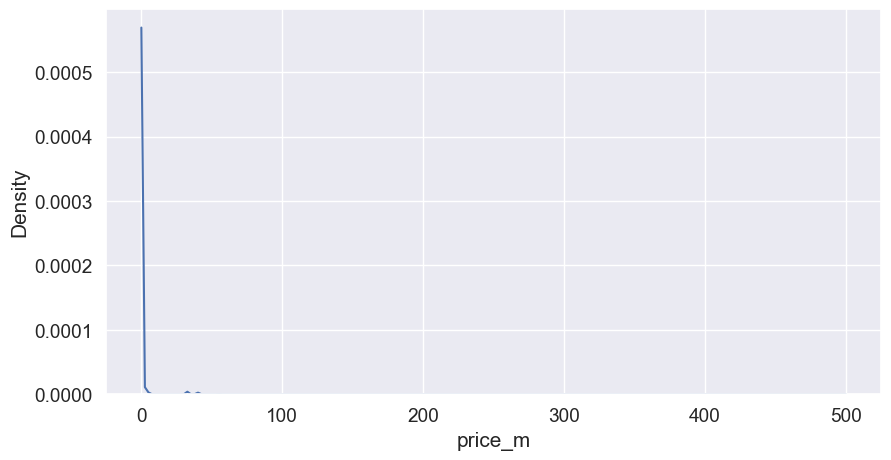

In [62]:
sns.kdeplot(data=merged_df['price_m'])

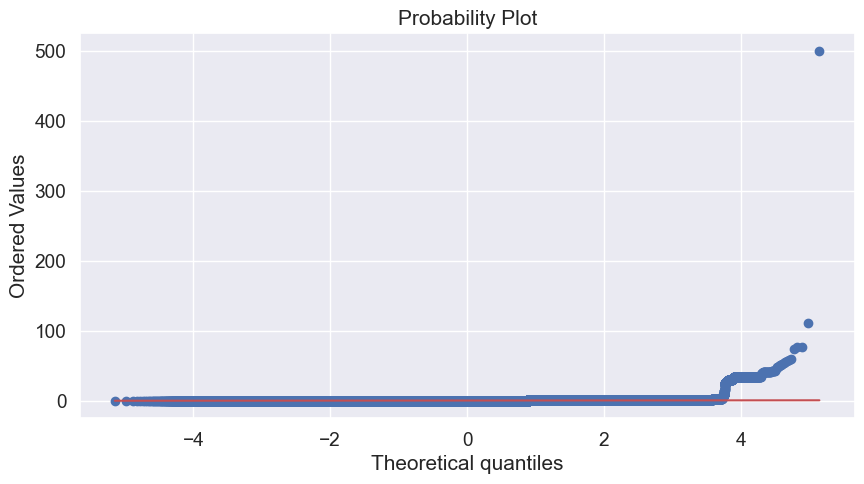

In [63]:
st.probplot(merged_df['price_m'], dist='norm', plot=plt)
plt.show()

На графике видно, что присутствует ярковыраженная правосторонняя асимметрия

Посмторим на наличие выбросов. Для этого построим "ящик с усами"

<AxesSubplot:>

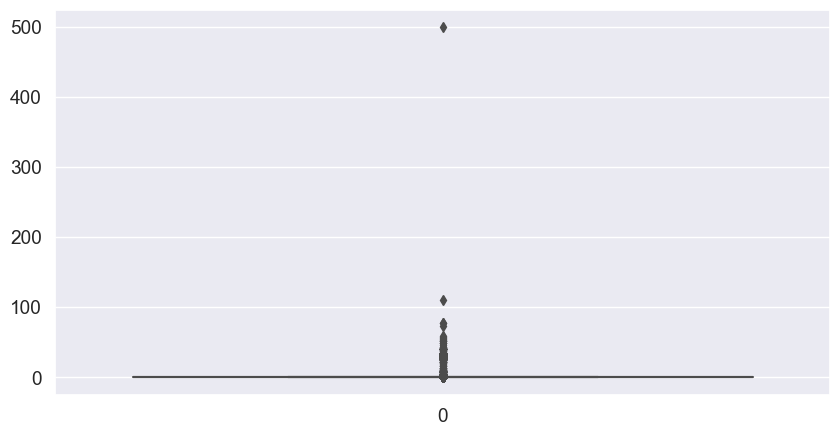

In [64]:
sns.boxplot(data=merged_df['price_m'])

На графике видно, что присутствуют "экстремальные" выбросы

Сгруппируем данные по году и региону, а затем удалим выбросы

In [65]:
def remove_outliers(group):
    q1 = group['price_m'].quantile(0.25)
    q3 = group['price_m'].quantile(0.75)
    iqr = q3 - q1
    ejection_l = q1 - 1.5 * iqr
    ejection_h = q3 + 1.5 * iqr
    return group[(group['price_m'] >= ejection_l) & (group['price_m'] <= ejection_h)]

good_df = merged_df.groupby(['year', 'reg_name']).apply(remove_outliers)
good_df = good_df.reset_index(drop=True)

In [66]:
good_df.shape

(5063632, 14)

In [67]:
good_df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,year,price_m
0,1.45,2018-05-04,6817,3,4,4,2,44.0,6.00,1,6817,Алтайский край,2018,0.032955
1,2.22,2018-08-03,6817,3,2,3,2,44.0,7.00,1,6817,Алтайский край,2018,0.050455
2,2.75,2018-08-31,6817,1,8,9,3,70.0,9.00,1,6817,Алтайский край,2018,0.039286
3,1.40,2018-09-08,6817,1,3,3,1,32.4,9.00,1,6817,Алтайский край,2018,0.043210
4,2.00,2018-09-08,6817,3,9,10,1,37.0,11.40,1,6817,Алтайский край,2018,0.054054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063627,1.45,2021-05-01,2604,3,2,3,1,40.0,10.00,11,2604,Ярославская область,2021,0.036250
5063628,3.20,2021-05-01,2604,3,1,4,1,47.0,10.00,1,2604,Ярославская область,2021,0.068085
5063629,5.60,2021-05-01,2604,3,7,7,2,67.0,11.00,1,2604,Ярославская область,2021,0.083582
5063630,3.10,2021-05-01,2604,3,6,12,3,59.3,8.00,1,2604,Ярославская область,2021,0.052277


In [68]:
good_df.isna().sum()

price            0
date             0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
code             0
reg_name         0
year             0
price_m          0
dtype: int64

<AxesSubplot:xlabel='price_m', ylabel='Density'>

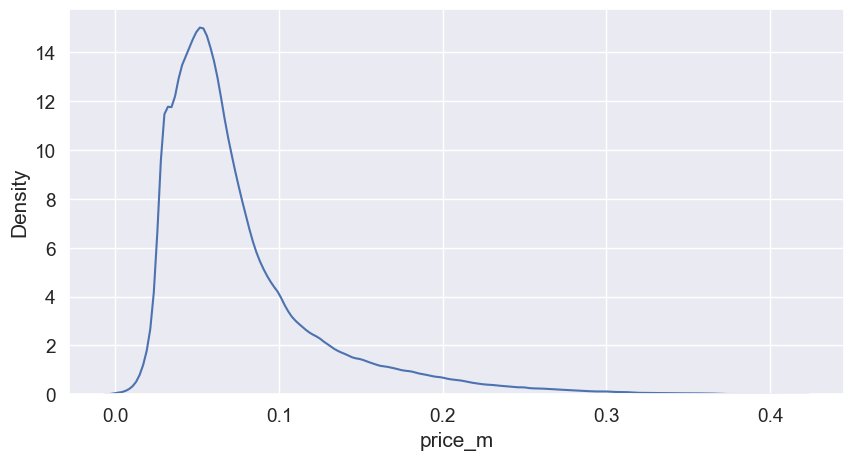

In [69]:
sns.kdeplot(data=good_df['price_m'])

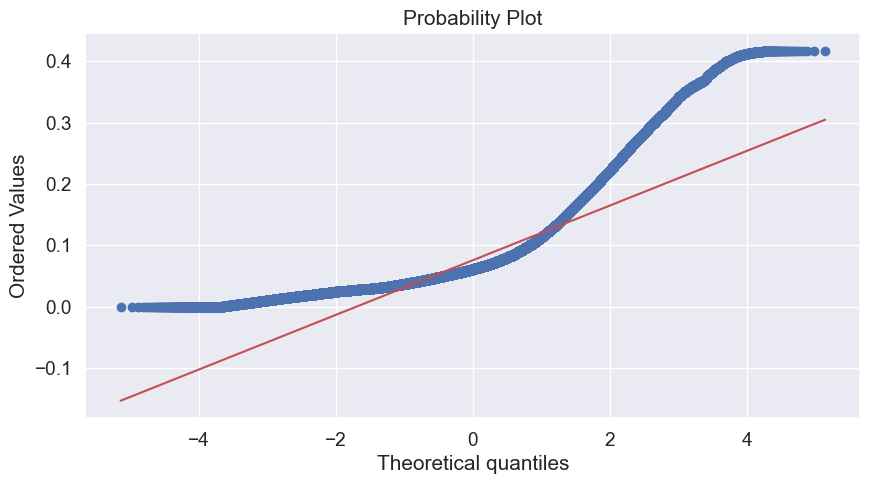

In [70]:
st.probplot(good_df['price_m'], dist='norm', plot=plt)
plt.show()

<AxesSubplot:>

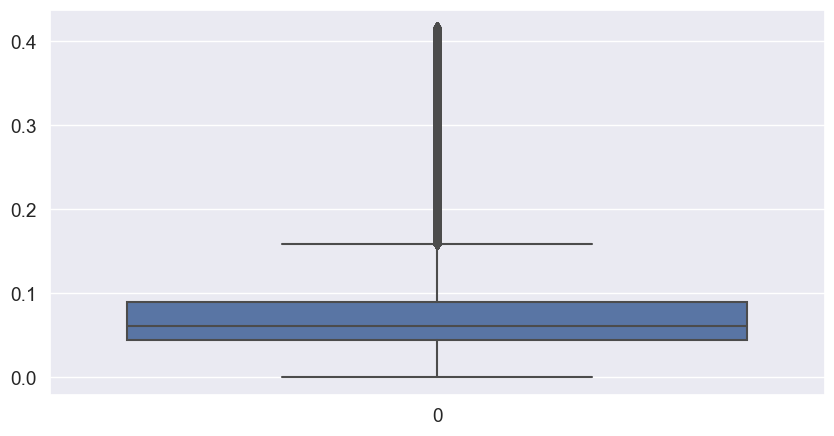

In [71]:
sns.boxplot(data=good_df['price_m'])

Наш набор данных очень массивный, следовательно тест на нормальность Шапиро-Уилка не подойдет, т.к. его проводят при наборе данных меньше 5000 (n < 5000)

В связи с этим проведет тест Харке-Бера, который обычно используется для больших наборов данных

Нулевая гипотеза H0 предполагает, что распределение нормально <br>
Альтернативная гипотеза H1 утверждает обратное

In [72]:
import scipy.stats as stats

data = good_df['price_m']

stats.jarque_bera(data)

Jarque_beraResult(statistic=9202605.706935976, pvalue=0.0)

Поскольку p-значение меньше 0,05, мы отвергаем нулевую гипотезу. Таким образом, у нас есть основания утверждать, что эти данные имеют асимметрию и эксцесс, которые значительно отличаются от нормального распределения

## 4. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2

Определим в каких регионах самая высокая цена за квадратный метр. Выведем топ-10

In [73]:
table_top = good_df.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).head(10)
table_top

,reg_name,price_m
29,Москва,0.193924
63,Санкт-Петербург,0.124181
30,Московская область,0.092133
1,Амурская область,0.086612
26,Ленинградская область,0.084094
52,Республика Крым,0.083760
2,Архангельская область,0.073502
81,Ямало-Ненецкий автономный округ,0.073356
76,Хабаровский край,0.071759
77,Ханты-Мансийский автономный округ,0.071370


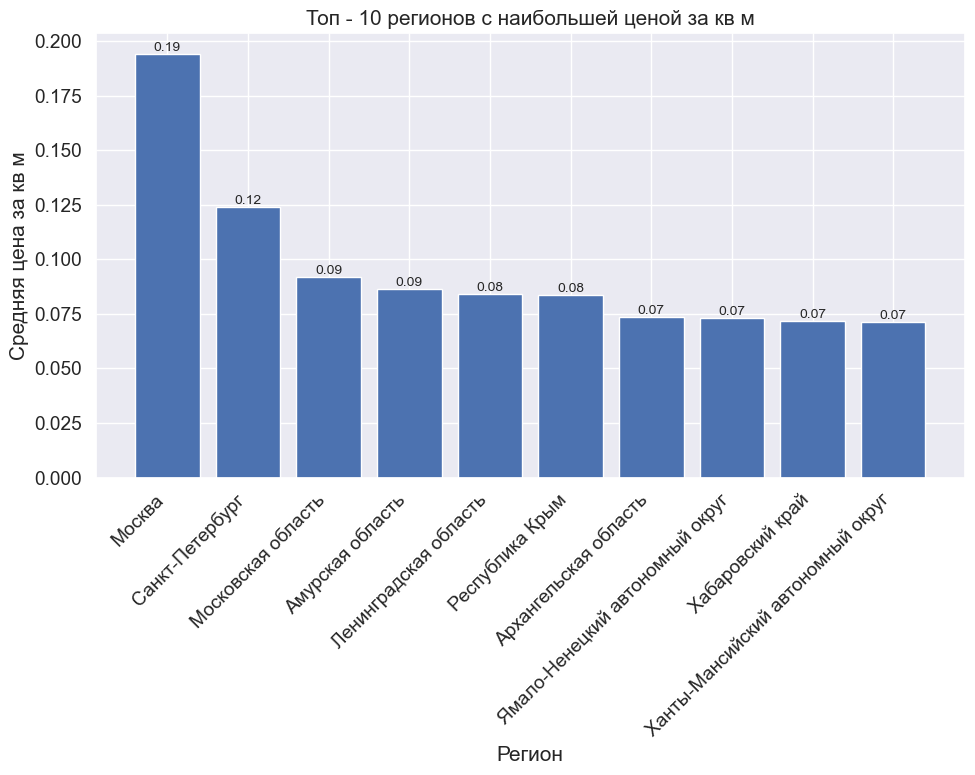

In [74]:
reg = table_top['reg_name']
price_m = table_top['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наибольшей ценой за кв м')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

На графике видно, что самая высокая цена за кв м в Москве, Санкт-Петербурге и Московской области

In [75]:
table_anti_top = good_df.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).tail(10)
table_anti_top

,reg_name,price_m
47,Республика Дагестан,0.040104
56,Республика Северная Осетия — Алания,0.040085
64,Саратовская область,0.038950
14,Кабардино-Балкарская Республика,0.038675
42,Псковская область,0.038219
53,Республика Марий Эл,0.037917
78,Челябинская область,0.037584
24,Курганская область,0.036844
49,Республика Калмыкия,0.035928
48,Республика Ингушетия,0.027210


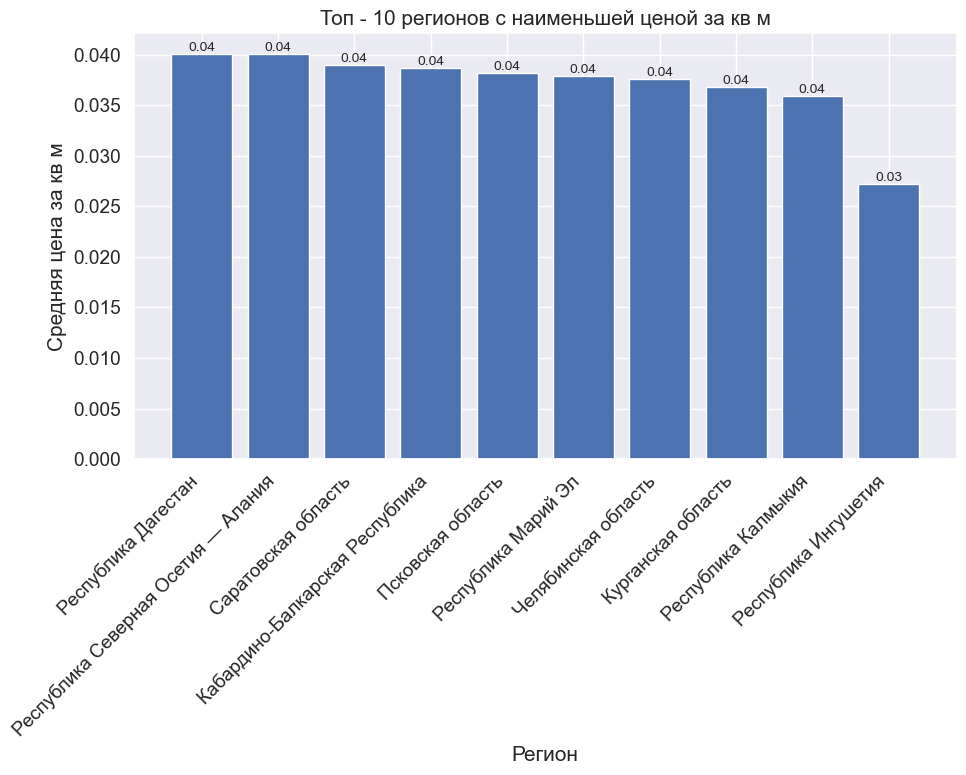

In [76]:
reg = table_anti_top['reg_name']
price_m = table_anti_top['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наименьшей ценой за кв м')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Таким образом, самая дешевая недвижимость в республике Дагестан, Северной Осетии и Саратовской области

Посмотрим более детально на рынок недвижимости. Выведем топ - 10 регионов по величине цены за кв м на первичном и вторичном рынках

In [77]:
top_first = good_df.query('object_type == 1')

In [78]:
top_first_table = top_first.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).head(10)
top_first_table

,reg_name,price_m
29,Москва,0.199772
63,Санкт-Петербург,0.123019
1,Амурская область,0.087487
30,Московская область,0.087467
52,Республика Крым,0.083506
26,Ленинградская область,0.082210
15,Калининградская область,0.076738
81,Ямало-Ненецкий автономный округ,0.073836
77,Ханты-Мансийский автономный округ,0.071060
58,Республика Тыва,0.070756


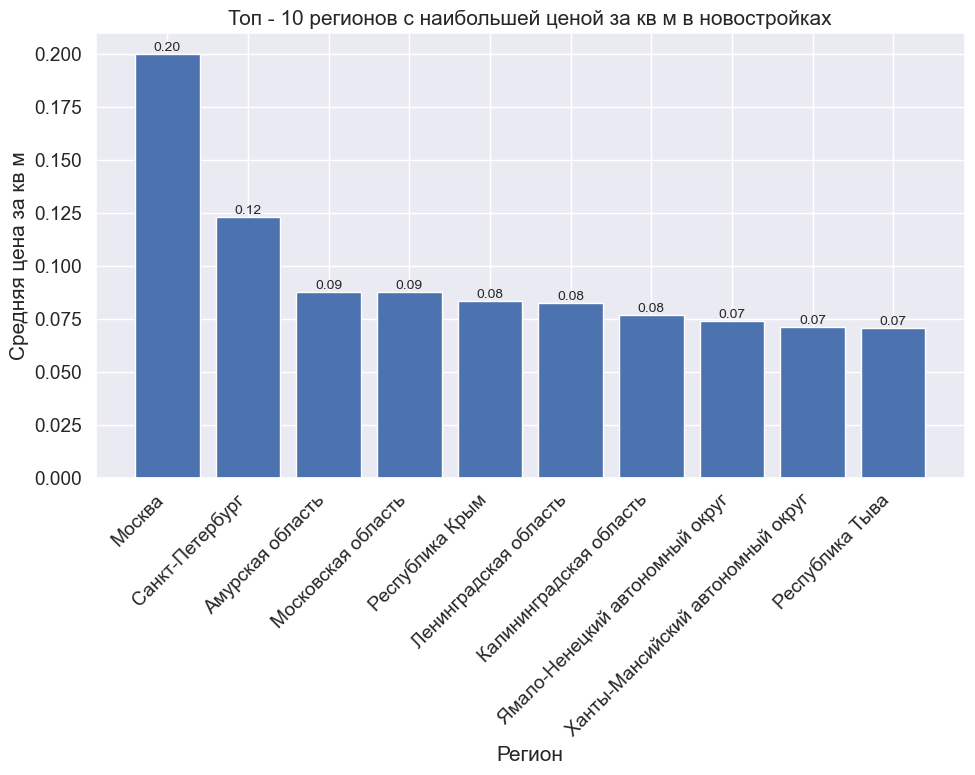

In [79]:
reg = top_first_table['reg_name']
price_m = top_first_table['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наибольшей ценой за кв м в новостройках')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [80]:
anti_top_first_table = top_first.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).tail(10)
anti_top_first_table

,reg_name,price_m
5,Брянская область,0.040483
56,Республика Северная Осетия — Алания,0.040384
19,Кемеровская область,0.040298
12,Ивановская область,0.039116
53,Республика Марий Эл,0.037905
42,Псковская область,0.037781
78,Челябинская область,0.037204
24,Курганская область,0.036563
49,Республика Калмыкия,0.035566
48,Республика Ингушетия,0.028579


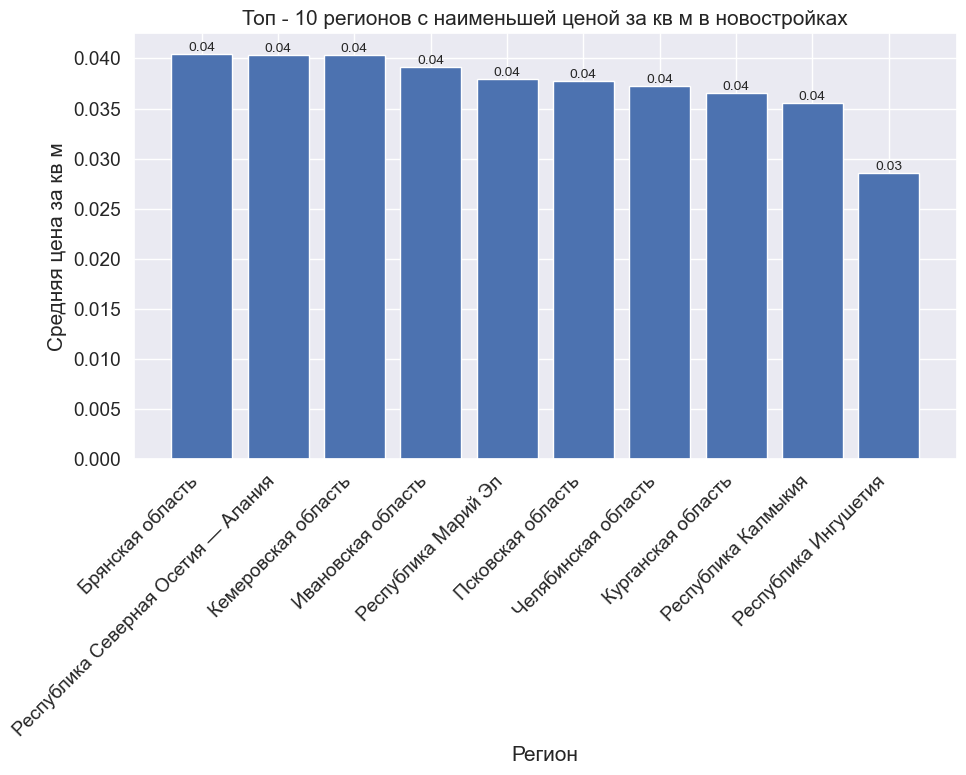

In [81]:
reg = anti_top_first_table['reg_name']
price_m = anti_top_first_table['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наименьшей ценой за кв м в новостройках')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

На графиках видно, что на кв м в новостройках самые высокие цены у Москвы и Санкт-Петербурга. Московская и Амурская области разделяют третье место

А вот среди регионов с самой низкой ценой за кв м отсутствует Республика Дагестан, зато появляется Брянская область и занимает лидирующую позицию

In [82]:
top_second = good_df.query('object_type == 11')

In [83]:
top_second_table = top_second.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).head(10)
top_second_table

,reg_name,price_m
28,Москва,0.186428
61,Санкт-Петербург,0.125779
29,Московская область,0.106772
74,Хабаровский край,0.095638
26,Ленинградская область,0.089641
50,Республика Крым,0.084290
1,Амурская область,0.080371
2,Архангельская область,0.079756
53,Республика Саха (Якутия),0.076897
55,Республика Татарстан,0.075856


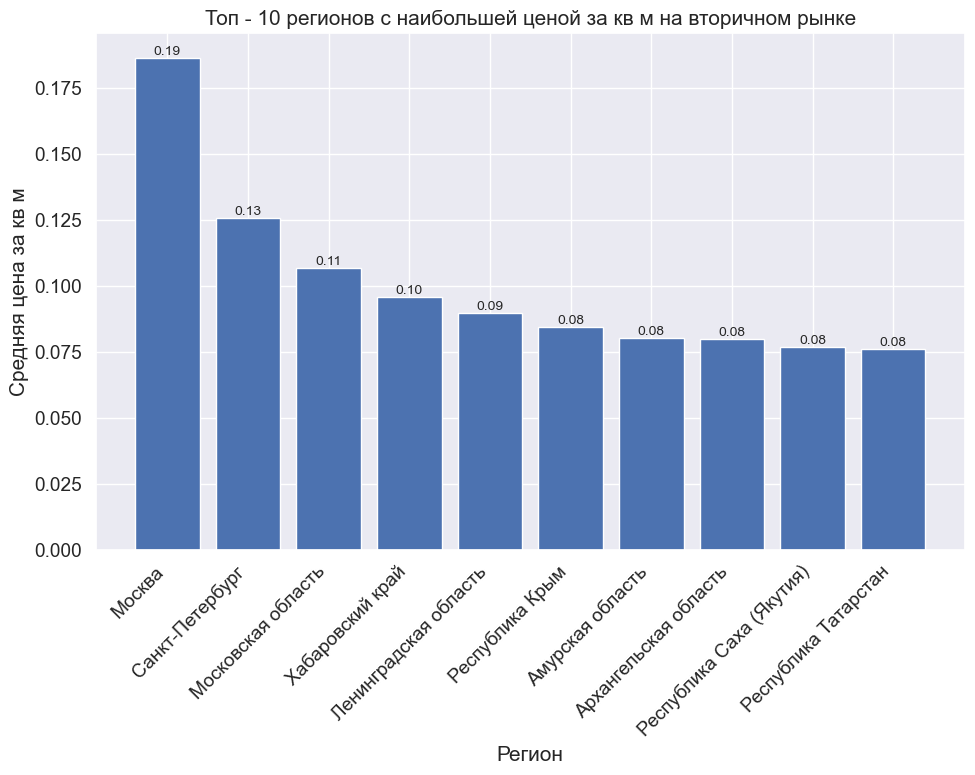

In [84]:
reg = top_second_table['reg_name']
price_m = top_second_table['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наибольшей ценой за кв м на вторичном рынке')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

In [85]:
anti_top_second_table = top_second.pivot_table(index='reg_name', values='price_m', aggfunc='mean').reset_index().sort_values(by='price_m', ascending=False).tail(10)
anti_top_second_table

,reg_name,price_m
24,Курганская область,0.039835
76,Челябинская область,0.039486
40,Псковская область,0.039376
54,Республика Северная Осетия — Алания,0.039180
47,Республика Калмыкия,0.038859
51,Республика Марий Эл,0.037966
62,Саратовская область,0.037093
45,Республика Дагестан,0.033285
14,Кабардино-Балкарская Республика,0.031637
46,Республика Ингушетия,0.025878


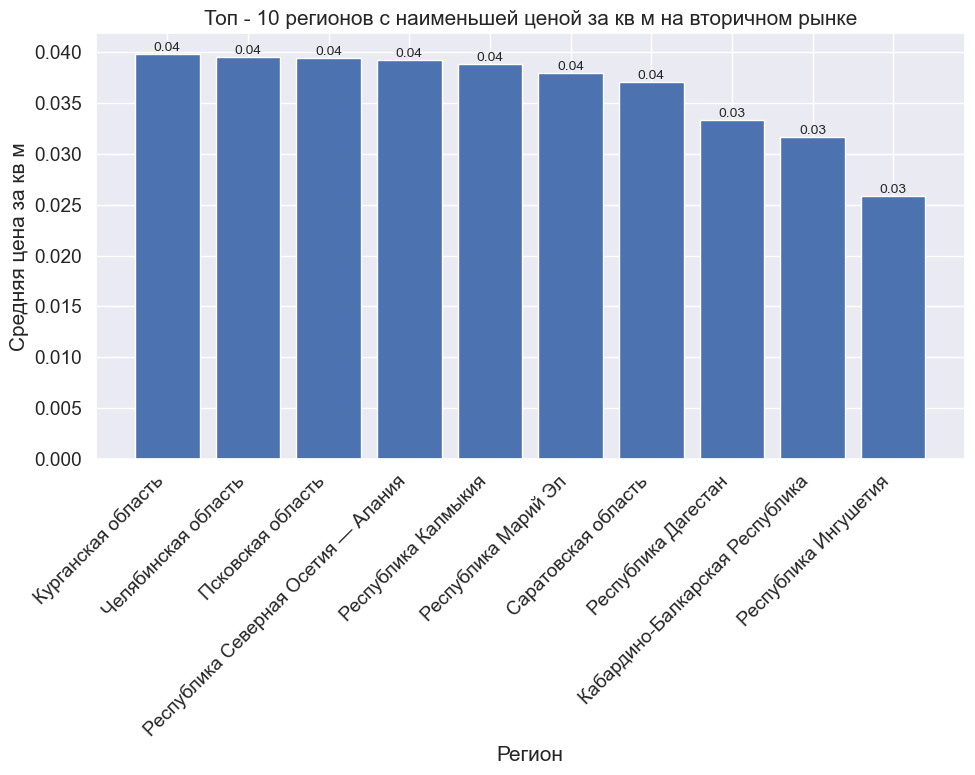

In [86]:
reg = anti_top_second_table['reg_name']
price_m = anti_top_second_table['price_m']

plt.figure(figsize=(10, 8))
bars = plt.bar(reg, price_m)
plt.xlabel('Регион')
plt.ylabel('Средняя цена за кв м')
plt.title('Топ - 10 регионов с наименьшей ценой за кв м на вторичном рынке')
plt.xticks(rotation=45, ha='right')

plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

Аналогично, самая высокая цена в Москве, Санкт-Петербурге и Московской области. 

На рынке дешевого вторичного жилья первое место занимает Курганская область. В этом рейтинге присутствует Республика Дагестан и занимает 8 место. Можно сделать вывод, что в данном регионе лучше всего развит именно вторичный рынок недвижимости  

Определим регионы, в которых цены на недвижимость за кв м наиболее динамичны (растут или снижаются) и регионы с наименьшими изменениями. Для этого воспользуемся функцией <code>'pct_change()'</code>, которая рассчитает относительный прирост цены на кв м

In [87]:
good_df['price_change'] = good_df.groupby('reg_name')['price_m'].pct_change()

Сгруппируем данные по регионам и вычислим некоторую статистику

In [88]:
price_change_df = good_df.groupby('reg_name')['price_change'].agg(['mean', 'median'])
price_change_df

,mean,median
reg_name,,
Алтайский край,0.140931,0.000000
Амурская область,0.047991,0.000000
Архангельская область,0.070431,0.000000
Астраханская область,0.404980,0.000000
Белгородская область,0.049851,0.000000
...,...,...
Челябинская область,0.045866,0.000000
Чеченская Республика,4.484398,0.007965
Чувашская Республика,0.079895,0.000000


Выявим регионы, где средние изменения цен на кв м наиболее динамичны

In [89]:
price_change_df.sort_values(by='mean', ascending=False).head(10)

,mean,median
reg_name,,
Республика Коми,188.572711,0.000000
Кабардино-Балкарская Республика,174.830234,0.000000
Республика Саха (Якутия),19.285024,0.001578
Московская область,15.815091,0.000000
Хабаровский край,4.603438,-0.006444
Чеченская Республика,4.484398,0.007965
Республика Дагестан,1.671375,0.000000
Республика Башкортостан,1.435765,0.000079
Республика Хакасия,1.385592,-0.003725


Далее вычислим стабильные регионы, т.е. регионы, где изменения цен минимальны или близки к нулю

Итак, самыми динамичными регионами являются Республика Коми и Кабардино-Балкарская Республика. Также в топ-5 входит Московская область

Теперь определим самые стабильные регионы

In [90]:
price_change_df.sort_values(by='mean', ascending=False).tail(10)

,mean,median
reg_name,,
Челябинская область,0.045866,0.000000
Курская область,0.044660,0.001250
Воронежская область,0.043881,0.000000
Вологодская область,0.043790,-0.000439
Республика Тыва,0.043648,-0.007665
Тюменская область,0.043413,0.000000
Липецкая область,0.037730,0.005625
Республика Адыгея,0.032034,-0.000692
Оренбургская область,0.031606,-0.001468


К самым стабильным регионам можно отнести Челябинскую и Курскую области

Далее переидем к исследованию региональных различий. Сравним рынки недвижимости в разных регионах

## 5. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности

Исследуем рынок недвижимости в Москве и Санкт-Петербурге (как представители регионов с самой дорогой недвижимостью), а также в республике Дагестан (как регион с самой дешевой недвижимостью)

### Рынок недвижимости в Москве

Посмотрим на рынок первичной и вторичной недвижимости в Москве

In [91]:
msc_df = good_df.query('reg_name == "Москва"')
msc_df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,year,price_m,price_change
151454,4.70428,2018-03-04,3,2,1,25,1,31.7,6.0,11,3,Москва,2018,0.148400,NaN
151455,8.00000,2018-03-17,3,1,5,9,2,45.0,6.0,1,3,Москва,2018,0.177778,0.197963
151456,11.50000,2018-04-03,3,1,14,16,3,64.9,8.0,1,3,Москва,2018,0.177196,-0.003274
151457,10.20000,2018-04-07,3,2,7,14,2,52.8,10.0,1,3,Москва,2018,0.193182,0.090217
151458,11.50000,2018-04-18,3,1,14,17,1,42.0,12.0,1,3,Москва,2018,0.273810,0.417367


Определим среднюю стоимость за кв м на рынке первичного и вторичного жилья в Москве. Визуализируем полученные результаты

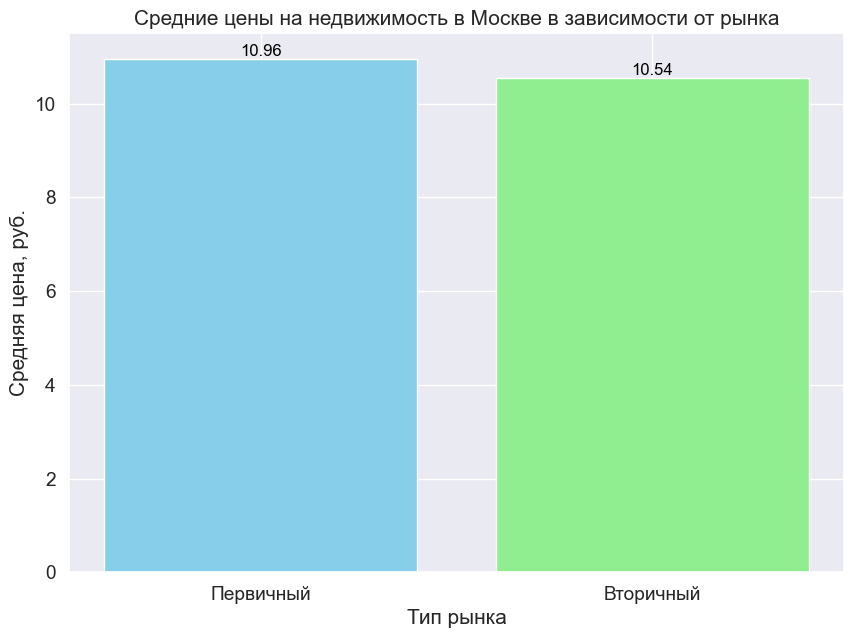

In [92]:
avg_price_first = msc_df.query('object_type == 1')['price'].mean()
avg_price_second = msc_df.query('object_type == 11')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Первичный', 'Вторичный'], [avg_price_first, avg_price_second], color=['skyblue', 'lightgreen'])
ax.set_xlabel('Тип рынка')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость в Москве в зависимости от рынка')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Как видно из графика, средняя стоимость квартир в московских новостройках немного дороже, чем вторичное жилье

Теперь посмотрим на среднюю стоимость цены за кв м в домах разных типов в новостройках

C:\Users\1\AppData\Local\Temp\ipykernel_8016\3791257031.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


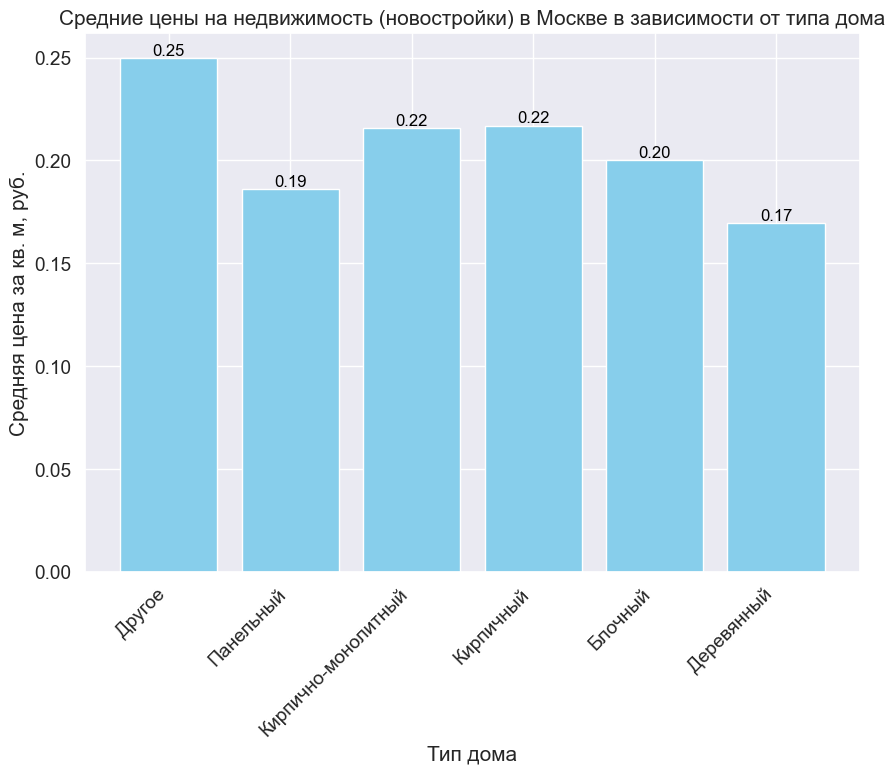

In [93]:
msc_buildtype_fst_0 = msc_df.query('object_type == 1 and building_type == 0')['price_m'].mean()
msc_buildtype_fst_1 = msc_df.query('object_type == 1 and building_type == 1')['price_m'].mean()
msc_buildtype_fst_2 = msc_df.query('object_type == 1 and building_type == 2')['price_m'].mean()
msc_buildtype_fst_3 = msc_df.query('object_type == 1 and building_type == 3')['price_m'].mean()
msc_buildtype_fst_4 = msc_df.query('object_type == 1 and building_type == 4')['price_m'].mean()
msc_buildtype_fst_5 = msc_df.query('object_type == 1 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [msc_buildtype_fst_0, msc_buildtype_fst_1, msc_buildtype_fst_2, msc_buildtype_fst_3, msc_buildtype_fst_4, msc_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Москве в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

In [94]:
msc_df.query('object_type == 1')['building_type'].value_counts()

1    118141
3     50874
2     45975
4     12895
0       797
5       502
Name: building_type, dtype: int64

Среди представленных категорий самая высокая цена на кв м в кирпичных и кирпично-монолитных домах. Самая низкая - в деревянных домах


Что касается соотношения численности домов разного типа, то неудивительно, что деревянных домов меньше всего, а панельных, наоборот, больше

Теперь рассмотрим то же самое, но вместо средней цены на кв м возьмем среднюю стоимость квартиры

C:\Users\1\AppData\Local\Temp\ipykernel_8016\1930010518.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


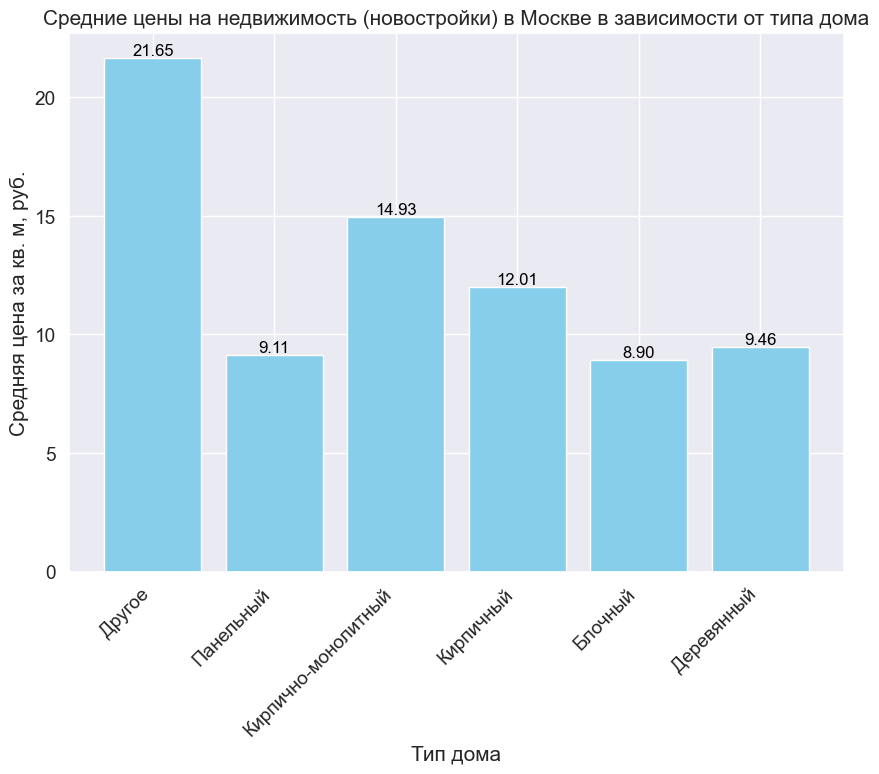

In [95]:
msc_buildtype_fst_0 = msc_df.query('object_type == 1 and building_type == 0')['price'].mean()
msc_buildtype_fst_1 = msc_df.query('object_type == 1 and building_type == 1')['price'].mean()
msc_buildtype_fst_2 = msc_df.query('object_type == 1 and building_type == 2')['price'].mean()
msc_buildtype_fst_3 = msc_df.query('object_type == 1 and building_type == 3')['price'].mean()
msc_buildtype_fst_4 = msc_df.query('object_type == 1 and building_type == 4')['price'].mean()
msc_buildtype_fst_5 = msc_df.query('object_type == 1 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [msc_buildtype_fst_0, msc_buildtype_fst_1, msc_buildtype_fst_2, msc_buildtype_fst_3, msc_buildtype_fst_4, msc_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Москве в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Теперь мы видим, что квартиры в кирпично-монолитных домах более востребованы, т.к. средняя стоимость в них выше

Отметим, что самые высокие цены на квартиры в домах категории "другое". Возможно это квартиры в домах пентхаусного типа, они зачастую самые дорогие. Кроме того, таких домов явно меньше, чем панельных или кирпичных

Также посмотрим на среднюю стоимость цены за кв м в домах разных типов на вторичном рынке

C:\Users\1\AppData\Local\Temp\ipykernel_8016\2643198715.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


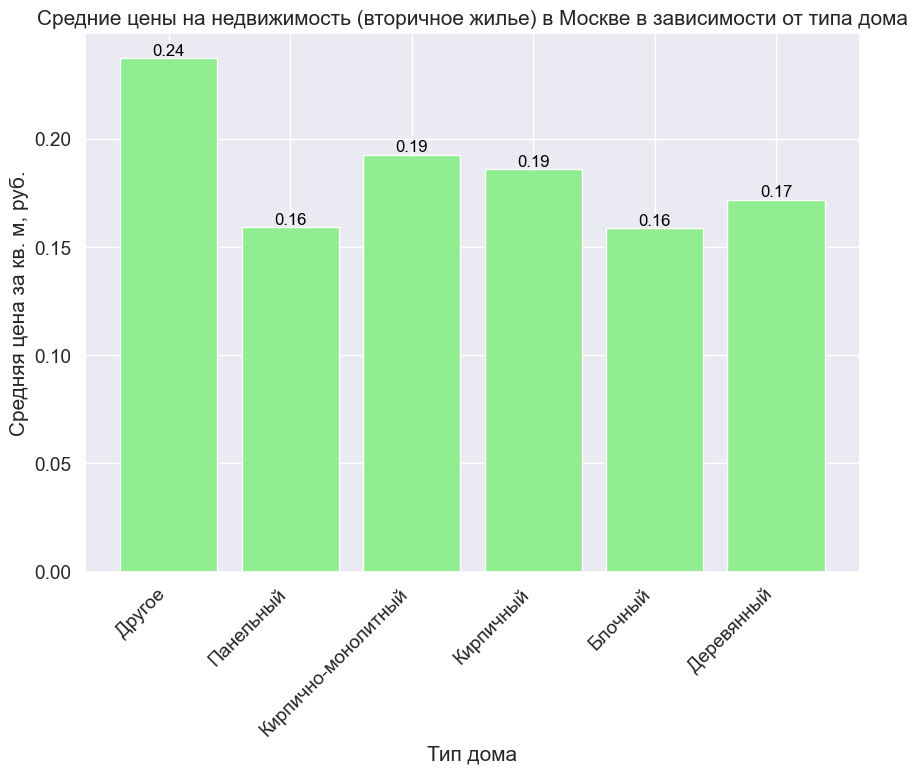

In [96]:
msc_buildtype_snd_0 = msc_df.query('object_type == 11 and building_type == 0')['price_m'].mean()
msc_buildtype_snd_1 = msc_df.query('object_type == 11 and building_type == 1')['price_m'].mean()
msc_buildtype_snd_2 = msc_df.query('object_type == 11 and building_type == 2')['price_m'].mean()
msc_buildtype_snd_3 = msc_df.query('object_type == 11 and building_type == 3')['price_m'].mean()
msc_buildtype_snd_4 = msc_df.query('object_type == 11 and building_type == 4')['price_m'].mean()
msc_buildtype_snd_5 = msc_df.query('object_type == 11 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [msc_buildtype_snd_0, msc_buildtype_snd_1, msc_buildtype_snd_2, msc_buildtype_snd_3, msc_buildtype_snd_4, msc_buildtype_snd_5], color=['lightgreen'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (вторичное жилье) в Москве в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_8016\851941019.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


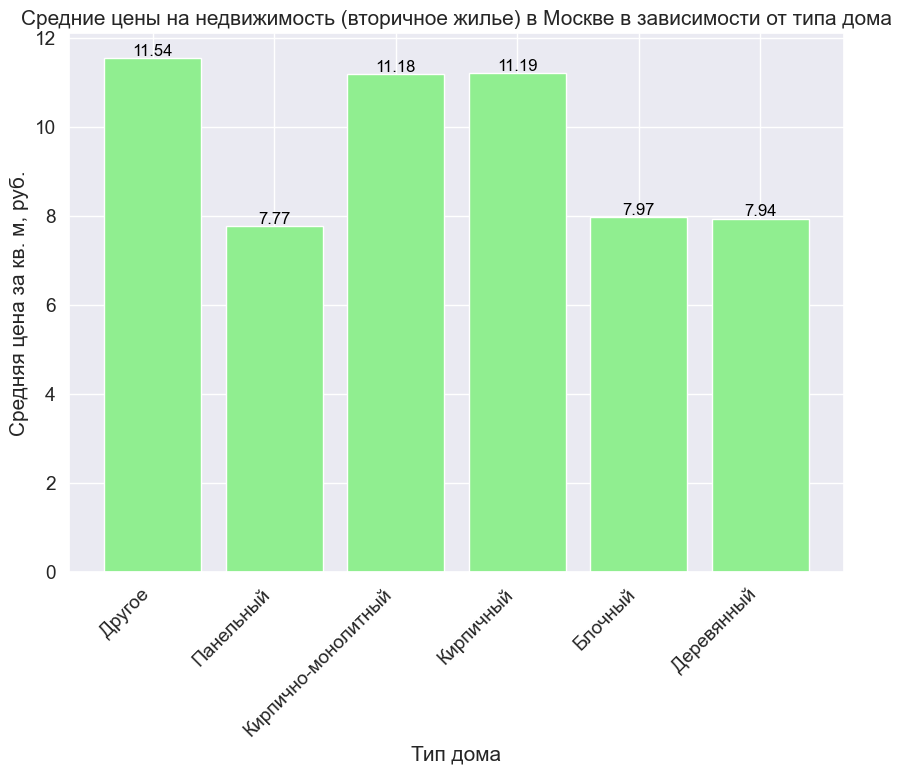

In [97]:
msc_buildtype_snd_0 = msc_df.query('object_type == 11 and building_type == 0')['price'].mean()
msc_buildtype_snd_1 = msc_df.query('object_type == 11 and building_type == 1')['price'].mean()
msc_buildtype_snd_2 = msc_df.query('object_type == 11 and building_type == 2')['price'].mean()
msc_buildtype_snd_3 = msc_df.query('object_type == 11 and building_type == 3')['price'].mean()
msc_buildtype_snd_4 = msc_df.query('object_type == 11 and building_type == 4')['price'].mean()
msc_buildtype_snd_5 = msc_df.query('object_type == 11 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [msc_buildtype_snd_0, msc_buildtype_snd_1, msc_buildtype_snd_2, msc_buildtype_snd_3, msc_buildtype_snd_4, msc_buildtype_snd_5], color=['lightgreen'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (вторичное жилье) в Москве в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

В целом на вторичном рынке наблюдается аналогичная картина. Цена на кв м в кирпичных и кирпично-монолитных домах выше. Это связано с тем, что в кирпичном доме теплее, там выше шумоизоляция и есть возможность сделать перепланировку

Теперь посмотрим зависимость цены на кв м от количества этажей в доме. Узнаем, влияет ли расположение квартиры на первом или последнем этаже на цену

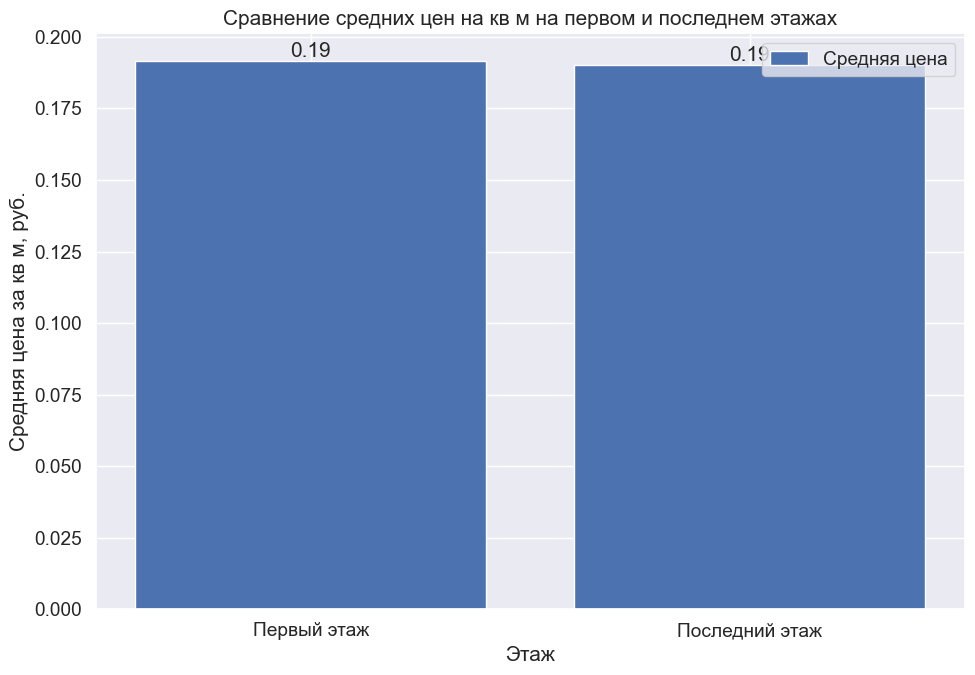

In [98]:
first_floor = msc_df.query('level == 1')

last_floor = msc_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price_m'].mean(), last_floor['price_m'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена за кв м, руб.')
ax.set_title('Сравнение средних цен на кв м на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Средние цены на 1 кв м одинаковые. Теперь посмотрим на общую стоимость квартиры

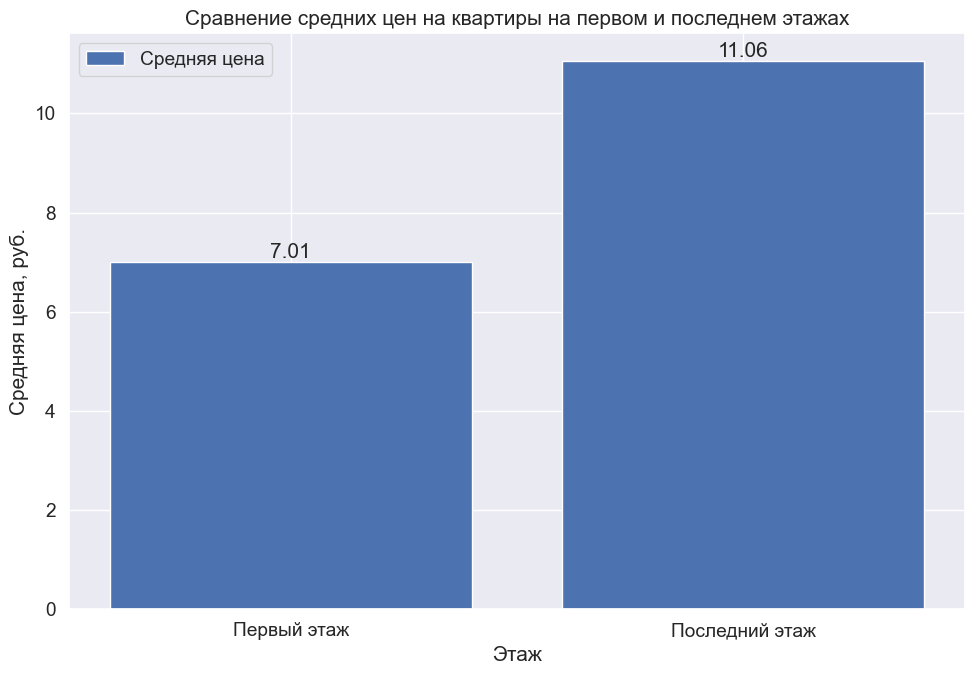

In [99]:
first_floor = msc_df.query('level == 1')

last_floor = msc_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price'].mean(), last_floor['price'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Сравнение средних цен на квартиры на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Действительно, зачастую квартиры на первом этаже не очень востребованы, следовательно и цены на них ниже. Чего нельзя сказать о мансарде, такие необычные квартиры пользуются спросом у покупателей, соответственно и цена на них выше

### Рынок недвижимости в Санкт-Петербурге

Посмотрим на рынок первичной и вторичной недвижимости в Санкт-Петербурге

In [100]:
spb_df = good_df.query('reg_name == "Санкт-Петербург"')
spb_df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,year,price_m,price_change
631257,6.05,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2661,Санкт-Петербург,2018,0.073245,NaN
631258,3.60,2018-03-04,2661,1,2,5,1,31.1,6.0,1,2661,Санкт-Петербург,2018,0.115756,0.580399
631259,3.20,2018-04-10,2661,1,7,9,1,31.0,7.0,1,2661,Санкт-Петербург,2018,0.103226,-0.108244
631260,6.50,2018-04-23,2661,3,3,3,3,89.0,10.0,1,2661,Санкт-Петербург,2018,0.073034,-0.292486
631261,6.30,2018-04-28,2661,3,5,5,2,99.9,14.5,1,2661,Санкт-Петербург,2018,0.063063,-0.136521


Определим среднюю стоимость за кв м на рынке первичного и вторичного жилья в Санкт-Петербурге. Визуализируем полученные результаты

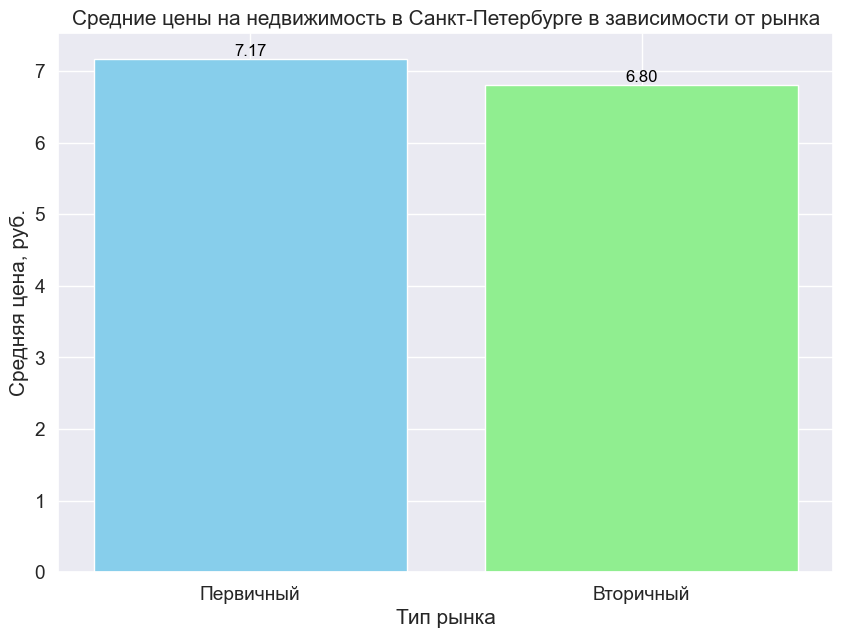

In [101]:
avg_price_first = spb_df.query('object_type == 1')['price'].mean()
avg_price_second = spb_df.query('object_type == 11')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Первичный', 'Вторичный'], [avg_price_first, avg_price_second], color=['skyblue', 'lightgreen'])
ax.set_xlabel('Тип рынка')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость в Санкт-Петербурге в зависимости от рынка')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Как видно из графика, стоимость квартир в новостройках СПб немного дороже, чем вторичное жилье

Теперь посмотрим на среднюю стоимость цены за кв м в домах разных типов в новостройках

C:\Users\1\AppData\Local\Temp\ipykernel_8016\2675048372.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


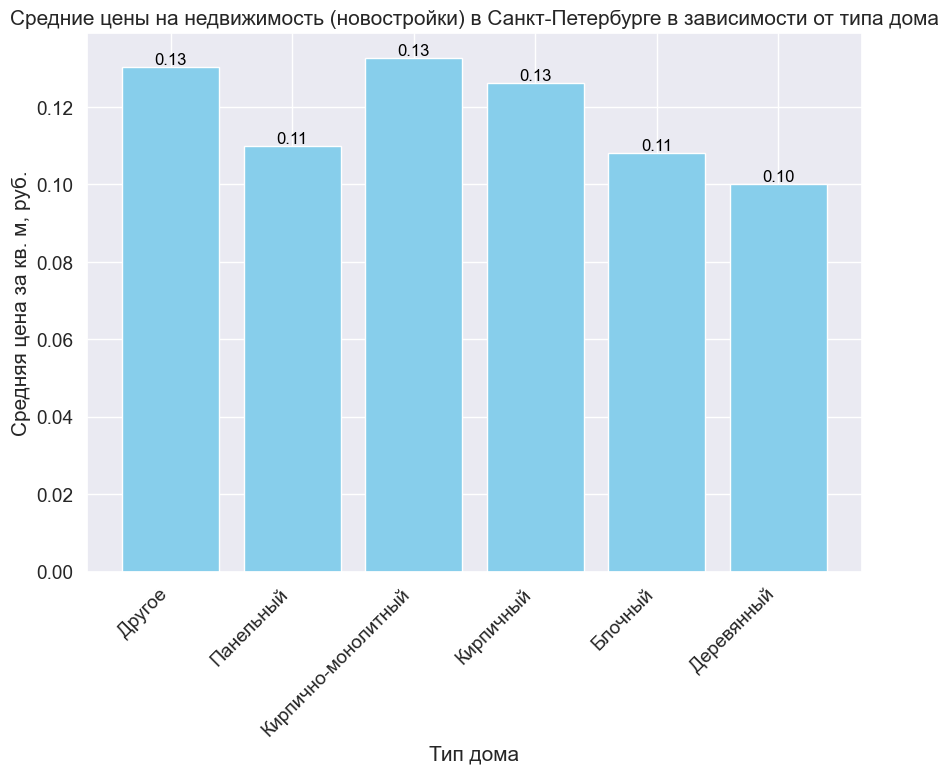

In [102]:
spb_buildtype_fst_0 = spb_df.query('object_type == 1 and building_type == 0')['price_m'].mean()
spb_buildtype_fst_1 = spb_df.query('object_type == 1 and building_type == 1')['price_m'].mean()
spb_buildtype_fst_2 = spb_df.query('object_type == 1 and building_type == 2')['price_m'].mean()
spb_buildtype_fst_3 = spb_df.query('object_type == 1 and building_type == 3')['price_m'].mean()
spb_buildtype_fst_4 = spb_df.query('object_type == 1 and building_type == 4')['price_m'].mean()
spb_buildtype_fst_5 = spb_df.query('object_type == 1 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [spb_buildtype_fst_0, spb_buildtype_fst_1, spb_buildtype_fst_2, spb_buildtype_fst_3, spb_buildtype_fst_4, spb_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Санкт-Петербурге в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

In [103]:
spb_df.query('object_type == 1')['building_type'].value_counts()

3    92004
1    71046
2    62351
0    18261
4     5302
5      197
Name: building_type, dtype: int64

Аналогично, среди представленных категорий самая высокая цена на кв м в кирпичных и кирпично-монолитных домах. Самая низкая - в деревянных домах

Что касается соотношения численности домов разного типа, то неудивительно, что деревянных домов меньше всего, а кирпично-монолитных, наоборот, больше

Теперь рассмотрим то же самое, но вместо средней цены на кв м возьмем среднюю стоимость квартиры

C:\Users\1\AppData\Local\Temp\ipykernel_8016\2372185961.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


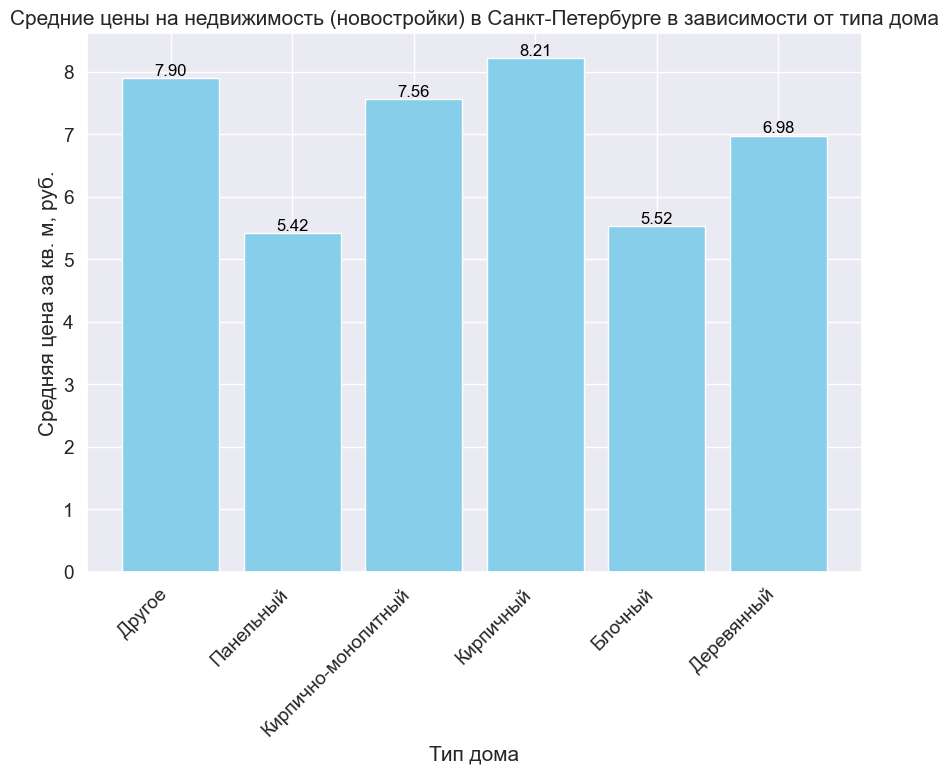

In [104]:
spb_buildtype_fst_0 = spb_df.query('object_type == 1 and building_type == 0')['price'].mean()
spb_buildtype_fst_1 = spb_df.query('object_type == 1 and building_type == 1')['price'].mean()
spb_buildtype_fst_2 = spb_df.query('object_type == 1 and building_type == 2')['price'].mean()
spb_buildtype_fst_3 = spb_df.query('object_type == 1 and building_type == 3')['price'].mean()
spb_buildtype_fst_4 = spb_df.query('object_type == 1 and building_type == 4')['price'].mean()
spb_buildtype_fst_5 = spb_df.query('object_type == 1 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [spb_buildtype_fst_0, spb_buildtype_fst_1, spb_buildtype_fst_2, spb_buildtype_fst_3, spb_buildtype_fst_4, spb_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Санкт-Петербурге в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Теперь мы видим, что квартиры в кирпичных домах более востребованы, т.к. средняя стоимость у них выше

Отметим, что самые высокие цены на квартиры в домах категории "другое". Возможно это квартиры в домах пентхаусного типа, они зачастую самые дорогие. Кроме того, таких домов явно меньше, чем панельных или кирпичных

Также можно заметить, что в Москве больше панельных домов, а в Санкт-Петербурге кирпично-монолитных

Также посмотрим на среднюю стоимость цены за кв м в домах разных типов на вторичном рынке

C:\Users\1\AppData\Local\Temp\ipykernel_8016\3126597487.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


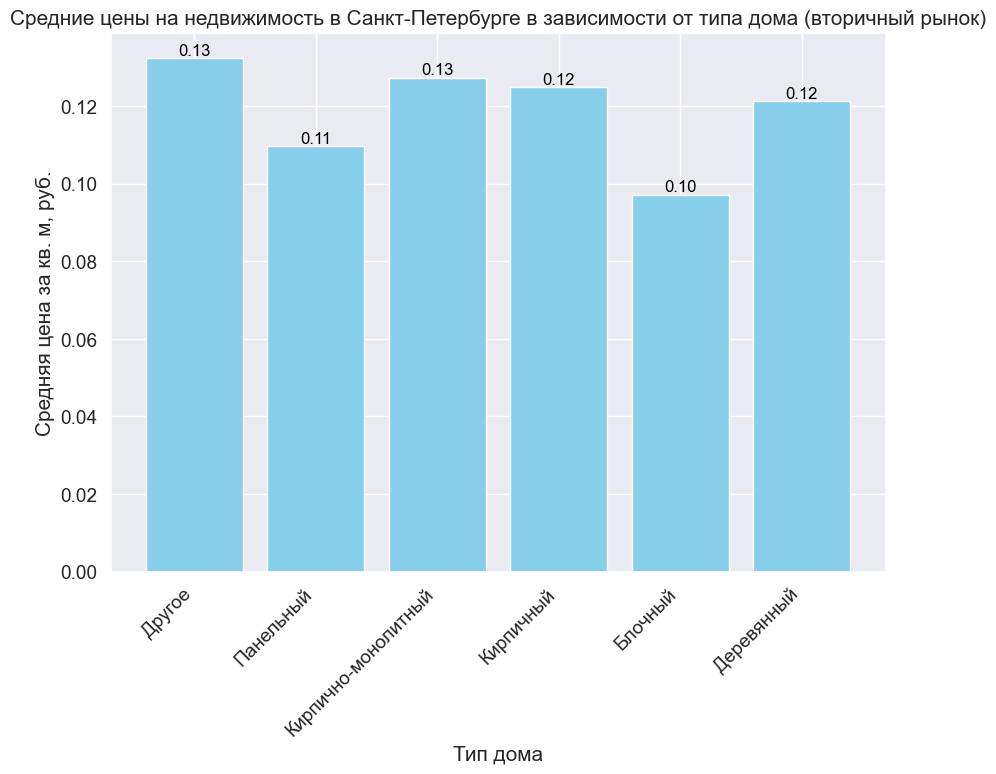

In [105]:
spb_buildtype_fst_0 = spb_df.query('object_type == 11 and building_type == 0')['price_m'].mean()
spb_buildtype_fst_1 = spb_df.query('object_type == 11 and building_type == 1')['price_m'].mean()
spb_buildtype_fst_2 = spb_df.query('object_type == 11 and building_type == 2')['price_m'].mean()
spb_buildtype_fst_3 = spb_df.query('object_type == 11 and building_type == 3')['price_m'].mean()
spb_buildtype_fst_4 = spb_df.query('object_type == 11 and building_type == 4')['price_m'].mean()
spb_buildtype_fst_5 = spb_df.query('object_type == 11 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [spb_buildtype_fst_0, spb_buildtype_fst_1, spb_buildtype_fst_2, spb_buildtype_fst_3, spb_buildtype_fst_4, spb_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость в Санкт-Петербурге в зависимости от типа дома (вторичный рынок)')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_8016\2884458089.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


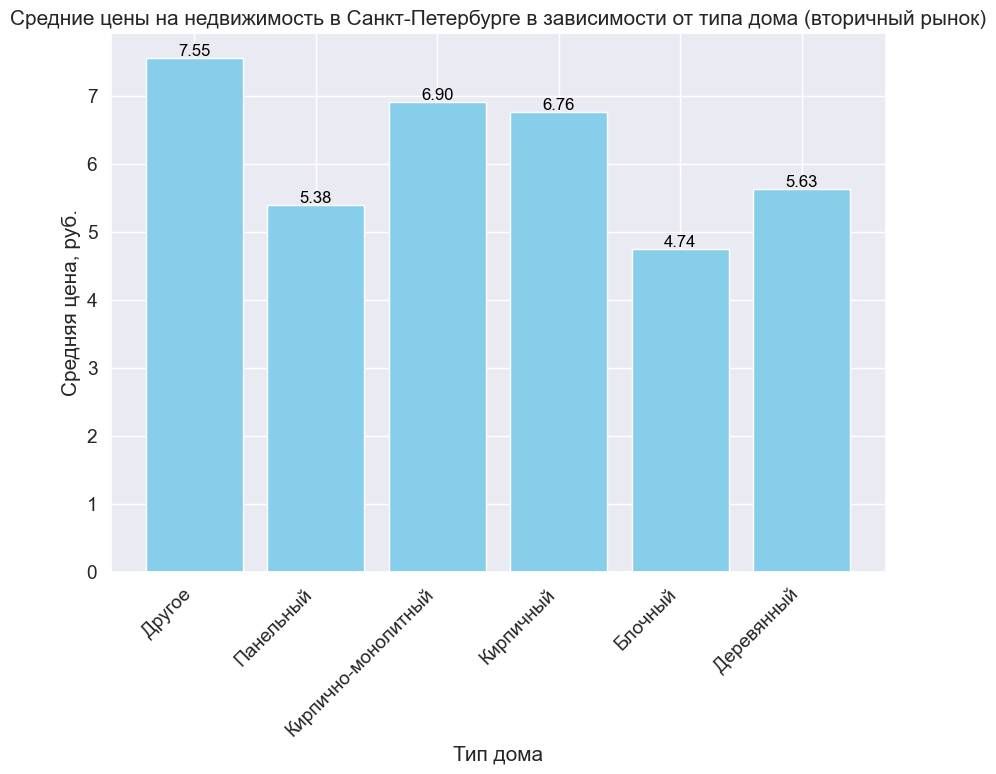

In [106]:
spb_buildtype_fst_0 = spb_df.query('object_type == 11 and building_type == 0')['price'].mean()
spb_buildtype_fst_1 = spb_df.query('object_type == 11 and building_type == 1')['price'].mean()
spb_buildtype_fst_2 = spb_df.query('object_type == 11 and building_type == 2')['price'].mean()
spb_buildtype_fst_3 = spb_df.query('object_type == 11 and building_type == 3')['price'].mean()
spb_buildtype_fst_4 = spb_df.query('object_type == 11 and building_type == 4')['price'].mean()
spb_buildtype_fst_5 = spb_df.query('object_type == 11 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [spb_buildtype_fst_0, spb_buildtype_fst_1, spb_buildtype_fst_2, spb_buildtype_fst_3, spb_buildtype_fst_4, spb_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость в Санкт-Петербурге в зависимости от типа дома (вторичный рынок)')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Самые дорогие квартиры располагаются в домах категории "другое". Предположение о том, что это за квартиры было высказано в предыдущем блоке (про Москву). Следом по величине стоимости идут квартиры кирпично-монолитных и кирпичных домах

В целом на вторичном рынке наблюдается аналогичная картина. Цена на кв м в кирпичных и кирпично-монолитных домах выше. Это связано с тем, что в кирпичном доме теплее, там выше шумоизоляция и есть возможность сделать перепланировку

Теперь посмотрим зависимость цены на кв м от количества этажей в доме. Узнаем, влияет ли расположение квартиры на первом или последнем этаже на цену

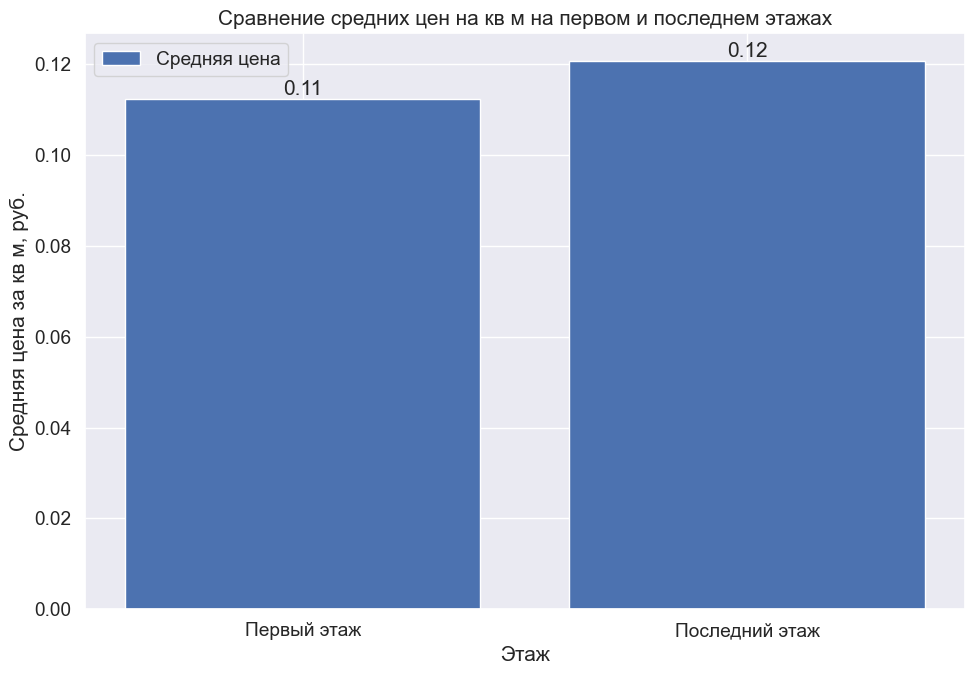

In [107]:
first_floor = spb_df.query('level == 1')

last_floor = spb_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price_m'].mean(), last_floor['price_m'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена за кв м, руб.')
ax.set_title('Сравнение средних цен на кв м на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Средние цены на 1 кв м почти одинаковые (в квартирах на последнем этаже средняя цена за кв метр чуть выше). Теперь посмотрим на общую стоимость квартиры

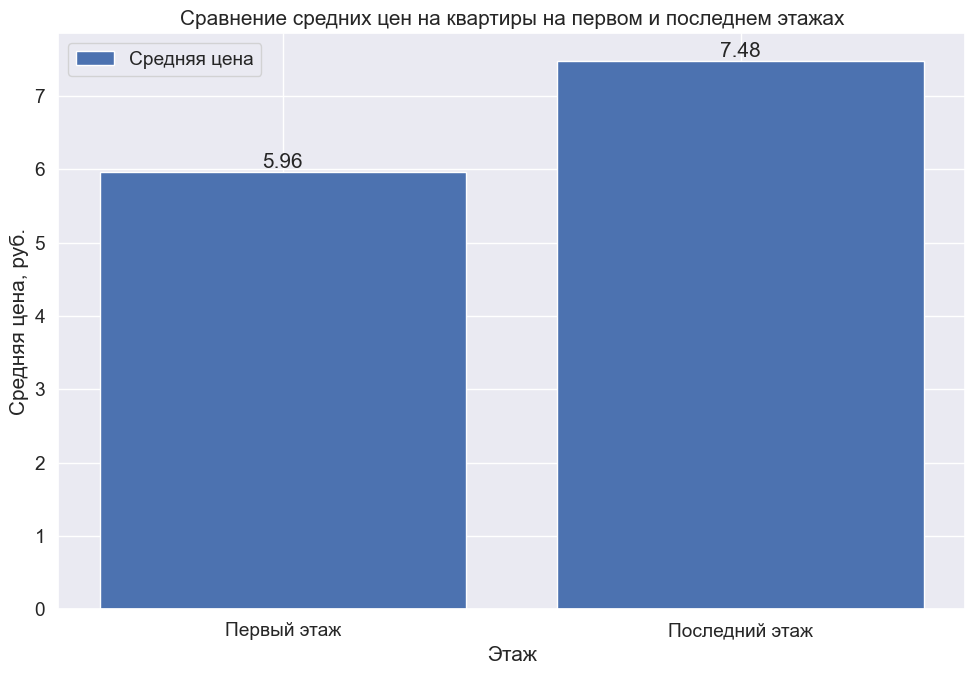

In [108]:
first_floor = spb_df.query('level == 1')

last_floor = spb_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price'].mean(), last_floor['price'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Сравнение средних цен на квартиры на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()


Ситуация аналогичная, как и на рынке недвижимости в Москве 


Зачастую квартиры на первом этаже не очень востребованы, следовательно и цены на них ниже. Чего нельзя сказать о мансарде, такие необычные квартиры пользуются спросом у покупателей, соответственно и цена на них выше






### Рынок недвижимости в Республике Дагестан



Посмотрим на рынок первичной и вторичной недвижимости в Дагестане

In [109]:
dag_df = good_df.query('reg_name == "Республика Дагестан"')
dag_df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,code,reg_name,year,price_m,price_change
519734,3.10,2018-09-08,4007,3,1,5,3,61.3,6.0,1,4007,Республика Дагестан,2018,0.050571,NaN
519735,4.50,2018-09-08,4007,2,2,6,3,103.0,20.0,11,4007,Республика Дагестан,2018,0.043689,-0.136079
519736,0.62,2018-09-08,4007,2,4,7,1,21.0,5.0,11,4007,Республика Дагестан,2018,0.029524,-0.324233
519737,2.75,2018-09-08,4007,1,5,5,3,59.0,9.0,1,4007,Республика Дагестан,2018,0.046610,0.578732
519738,1.10,2018-09-08,4007,3,4,4,2,44.0,17.0,1,4007,Республика Дагестан,2018,0.025000,-0.463636


Определим среднюю стоимость за кв м на рынке первичного и вторичного жилья в Дагестане. Визуализируем полученные результаты

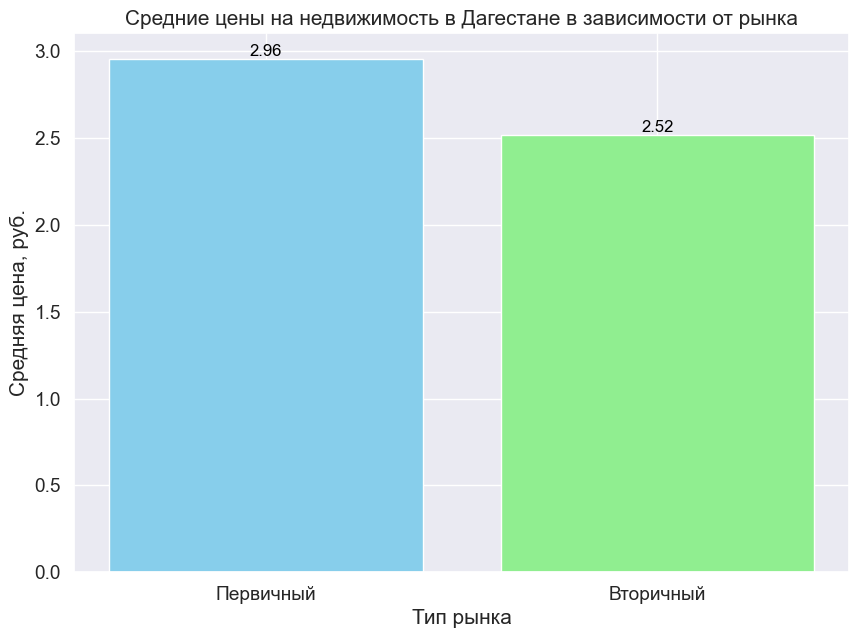

In [110]:
avg_price_first = dag_df.query('object_type == 1')['price'].mean()
avg_price_second = dag_df.query('object_type == 11')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Первичный', 'Вторичный'], [avg_price_first, avg_price_second], color=['skyblue', 'lightgreen'])
ax.set_xlabel('Тип рынка')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость в Дагестане в зависимости от рынка')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Средняя стоимость новостроек выше, чем стоимость вторичного жилья

Теперь посмотрим на среднюю стоимость цены за кв м в домах разных типов в новостройках

C:\Users\1\AppData\Local\Temp\ipykernel_8016\2913331789.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


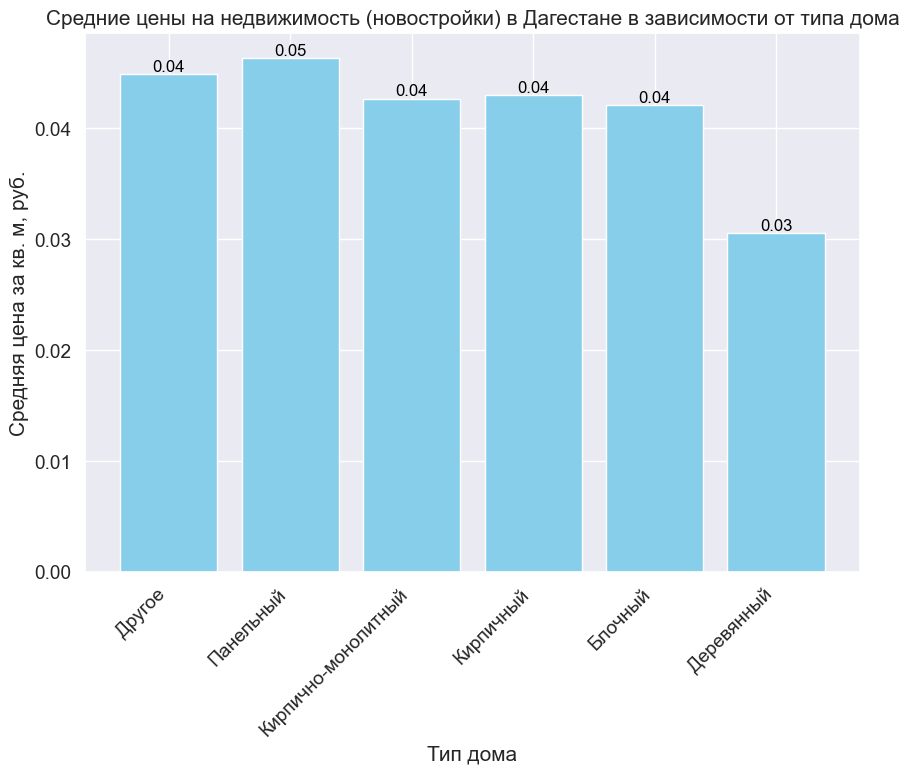

In [111]:
dag_buildtype_fst_0 = dag_df.query('object_type == 1 and building_type == 0')['price_m'].mean()
dag_buildtype_fst_1 = dag_df.query('object_type == 1 and building_type == 1')['price_m'].mean()
dag_buildtype_fst_2 = dag_df.query('object_type == 1 and building_type == 2')['price_m'].mean()
dag_buildtype_fst_3 = dag_df.query('object_type == 1 and building_type == 3')['price_m'].mean()
dag_buildtype_fst_4 = dag_df.query('object_type == 1 and building_type == 4')['price_m'].mean()
dag_buildtype_fst_5 = dag_df.query('object_type == 1 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [dag_buildtype_fst_0, dag_buildtype_fst_1, dag_buildtype_fst_2, dag_buildtype_fst_3, dag_buildtype_fst_4, dag_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв. м, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Дагестане в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Самые дорогие квартиры располагаются в панельных домах. В отличие от рынка недвижимости в Москве и Санкт-Петербурге, где самые дорогие квартиры находятся в основном в кирпичных домах

In [112]:
dag_df.query('object_type == 1')['building_type'].value_counts()

3    8452
1    8058
2    3664
0     313
4     303
5      12
Name: building_type, dtype: int64

Мы видим, что в основном преобладают панельные и кирпичные дома. При этом деревянных домов очень мало. В связи с тем, что республика расположена в полупустынной и пустынной зоне, там попросту нет лесоматериалов для строительства деревянных домов. Также климат достаточно сухой, поэтому с точки зрения пожаробезопасности это не практично

Теперь рассмотрим то же самое, но вместо средней цены на кв м возьмем среднюю стоимость квартиры

C:\Users\1\AppData\Local\Temp\ipykernel_8016\159775539.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


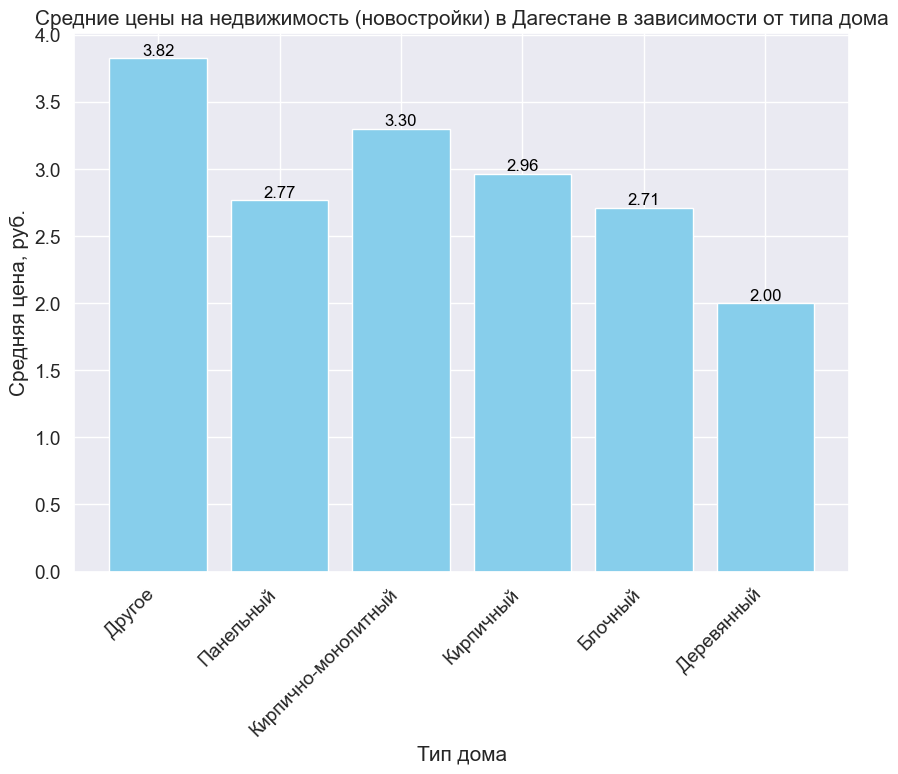

In [113]:
dag_buildtype_fst_0 = dag_df.query('object_type == 1 and building_type == 0')['price'].mean()
dag_buildtype_fst_1 = dag_df.query('object_type == 1 and building_type == 1')['price'].mean()
dag_buildtype_fst_2 = dag_df.query('object_type == 1 and building_type == 2')['price'].mean()
dag_buildtype_fst_3 = dag_df.query('object_type == 1 and building_type == 3')['price'].mean()
dag_buildtype_fst_4 = dag_df.query('object_type == 1 and building_type == 4')['price'].mean()
dag_buildtype_fst_5 = dag_df.query('object_type == 1 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [dag_buildtype_fst_0, dag_buildtype_fst_1, dag_buildtype_fst_2, dag_buildtype_fst_3, dag_buildtype_fst_4, dag_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость (новостройки) в Дагестане в зависимости от типа дома')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Отметим, что самые высокие цены на квартиры в домах категории "другое". Возможно это квартиры в домах пентхаусного типа, они зачастую самые дорогие. Кроме того, таких домов явно меньше, чем панельных или кирпичных

Также посмотрим на среднюю стоимость цены за кв м в домах разных типов на вторичном рынке

C:\Users\1\AppData\Local\Temp\ipykernel_8016\3906868210.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


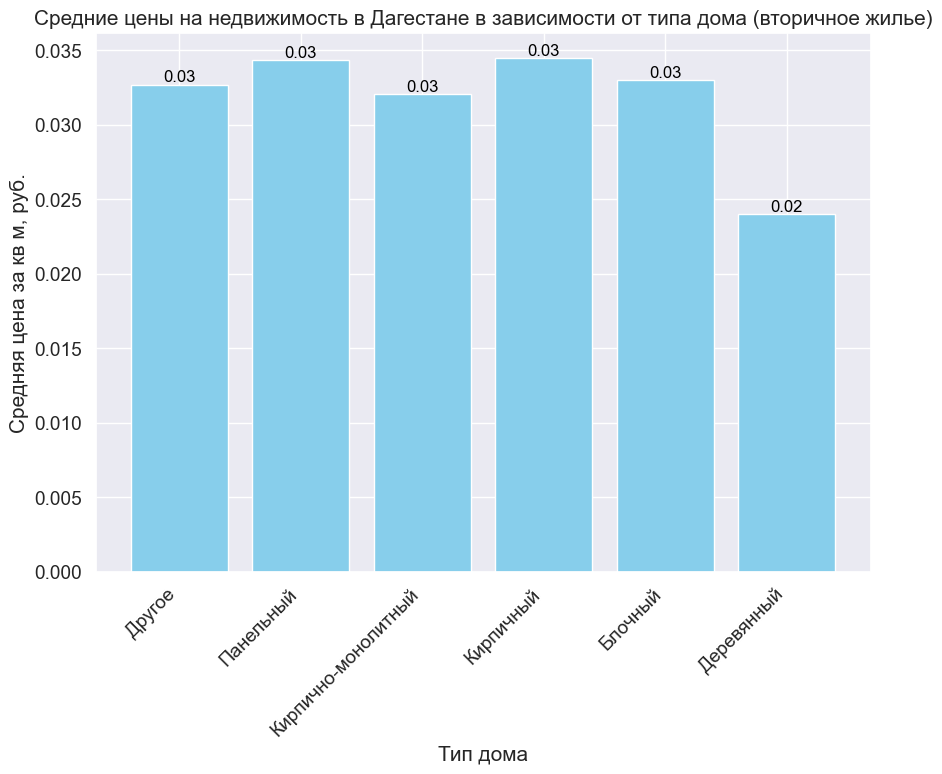

In [114]:
dag_buildtype_fst_0 = dag_df.query('object_type == 11 and building_type == 0')['price_m'].mean()
dag_buildtype_fst_1 = dag_df.query('object_type == 11 and building_type == 1')['price_m'].mean()
dag_buildtype_fst_2 = dag_df.query('object_type == 11 and building_type == 2')['price_m'].mean()
dag_buildtype_fst_3 = dag_df.query('object_type == 11 and building_type == 3')['price_m'].mean()
dag_buildtype_fst_4 = dag_df.query('object_type == 11 and building_type == 4')['price_m'].mean()
dag_buildtype_fst_5 = dag_df.query('object_type == 11 and building_type == 5')['price_m'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [dag_buildtype_fst_0, dag_buildtype_fst_1, dag_buildtype_fst_2, dag_buildtype_fst_3, dag_buildtype_fst_4, dag_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена за кв м, руб.')
ax.set_title('Средние цены на недвижимость в Дагестане в зависимости от типа дома (вторичное жилье)')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_8016\3142514405.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')


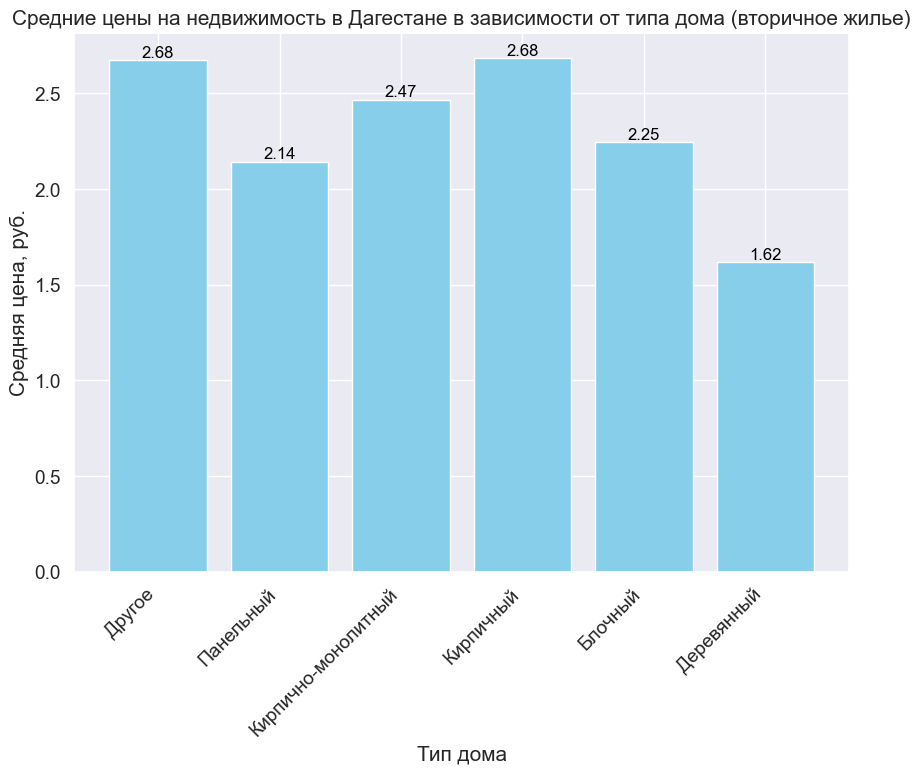

In [115]:
dag_buildtype_fst_0 = dag_df.query('object_type == 11 and building_type == 0')['price'].mean()
dag_buildtype_fst_1 = dag_df.query('object_type == 11 and building_type == 1')['price'].mean()
dag_buildtype_fst_2 = dag_df.query('object_type == 11 and building_type == 2')['price'].mean()
dag_buildtype_fst_3 = dag_df.query('object_type == 11 and building_type == 3')['price'].mean()
dag_buildtype_fst_4 = dag_df.query('object_type == 11 and building_type == 4')['price'].mean()
dag_buildtype_fst_5 = dag_df.query('object_type == 11 and building_type == 5')['price'].mean()

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], [dag_buildtype_fst_0, dag_buildtype_fst_1, dag_buildtype_fst_2, dag_buildtype_fst_3, dag_buildtype_fst_4, dag_buildtype_fst_5], color=['skyblue'])
ax.set_xlabel('Тип дома')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Средние цены на недвижимость в Дагестане в зависимости от типа дома (вторичное жилье)')

ax.set_xticklabels(['Другое', 'Панельный', 'Кирпично-монолитный', 'Кирпичный', 'Блочный', 'Деревянный'], rotation=45, ha='right')

ax.bar_label(bars, fmt='%.2f', label_type='edge', color='black', fontsize=12)

plt.show()

Самая высокая стоимость квартир в кирпичных домах и в категории "другое". Аналогичный результат получился на рынке недвижимости в Москве и СПб

Теперь посмотрим зависимость цены на кв м от количества этажей в доме. Узнаем, влияет ли расположение квартиры на первом или последнем этаже на цену

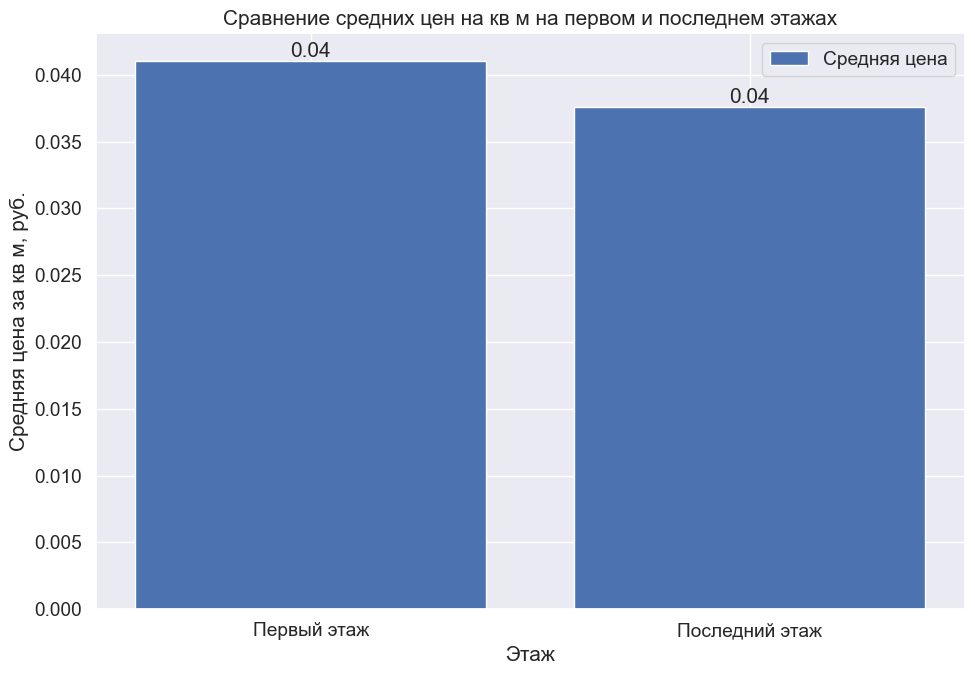

In [116]:
first_floor = dag_df.query('level == 1')

last_floor = dag_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price_m'].mean(), last_floor['price_m'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена за кв м, руб.')
ax.set_title('Сравнение средних цен на кв м на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Средние цены на 1 кв м одинаковые. Теперь посмотрим на общую стоимость квартир

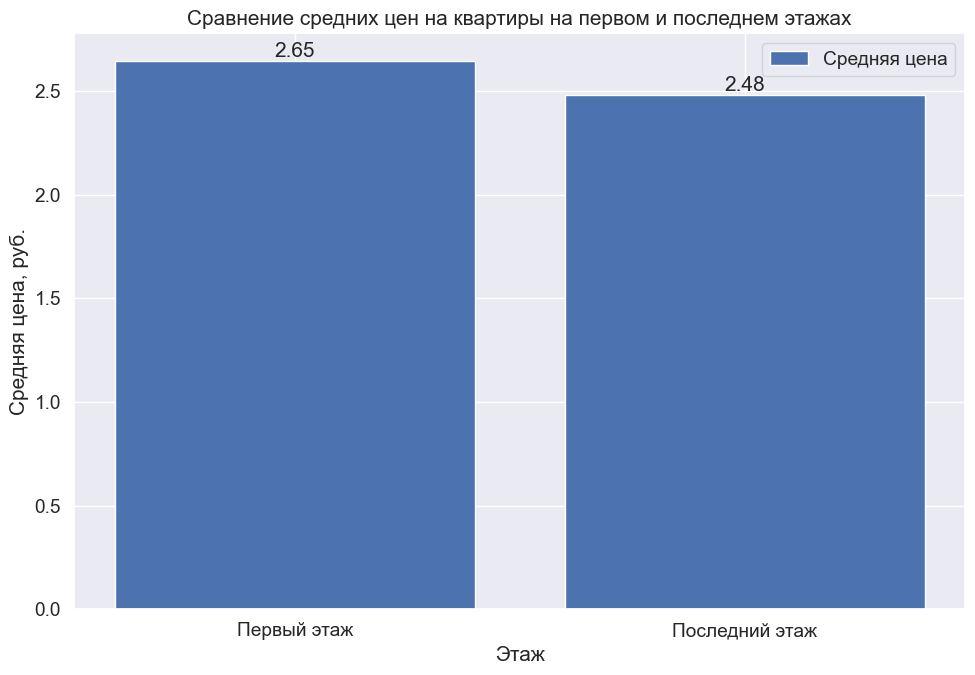

In [117]:
first_floor = dag_df.query('level == 1')

last_floor = dag_df.query('level == levels')

fig, ax = plt.subplots(figsize=(10, 7))
index = [1, 2]

bars = ax.bar(index, [first_floor['price'].mean(), last_floor['price'].mean()], label='Средняя цена')
ax.set_xlabel('Этаж')
ax.set_ylabel('Средняя цена, руб.')
ax.set_title('Сравнение средних цен на квартиры на первом и последнем этажах')
ax.set_xticks(index)
ax.set_xticklabels(['Первый этаж', 'Последний этаж'])
ax.legend()

ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Квартиры на первом этаже наоборот дороже, в отличие от квартир на последнем. На рынке недвижимости Москвы и СПб ровно наоборот

## 5. Когда выгодно покупать/продавать объект недвижимости?

In [118]:
good_df['year'] = good_df['date'].dt.year
good_df['month'] = good_df['date'].dt.month

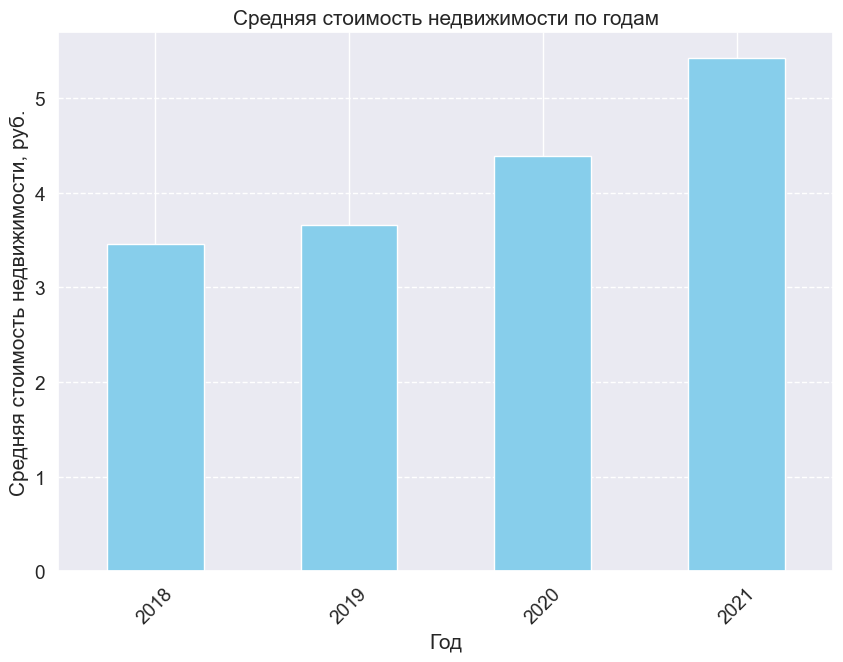

In [119]:
average_prices_by_year = good_df.groupby('year')['price'].mean()

plt.figure(figsize=(10, 7))
average_prices_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость недвижимости, руб.')
plt.title('Средняя стоимость недвижимости по годам')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

Мы видим тенденцию на увеличение. Недвижимость с каждым годом дорожает

Сделаем детализацию по месяцам в 2019 году

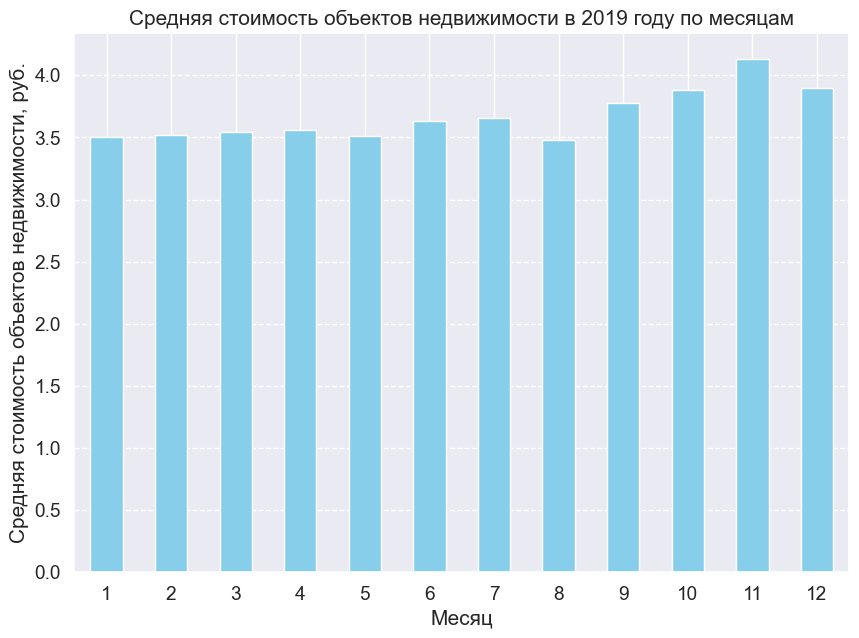

In [120]:
good_df_2019 = good_df[good_df['date'].dt.year == 2019]

average_prices_by_month_2019 = good_df_2019.groupby(good_df_2019['date'].dt.month)['price'].mean()

plt.figure(figsize=(10, 7))
average_prices_by_month_2019.plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость объектов недвижимости, руб.')
plt.title('Средняя стоимость объектов недвижимости в 2019 году по месяцам')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Сделаем детализацию по месяцам в 2020 году

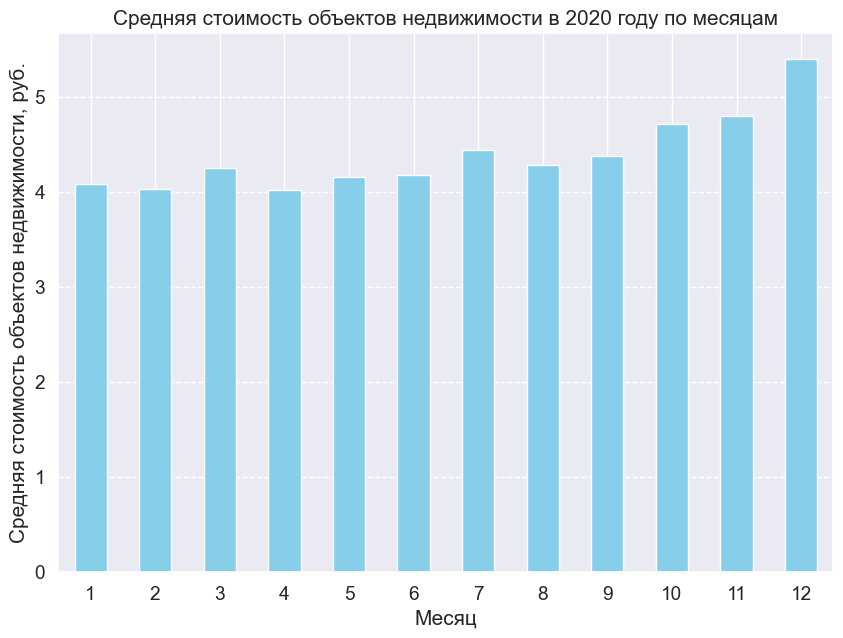

In [121]:
good_df_2020 = good_df[good_df['date'].dt.year == 2020]

average_prices_by_month_2020 = good_df_2020.groupby(good_df_2020['date'].dt.month)['price'].mean()

plt.figure(figsize=(10, 7))
average_prices_by_month_2020.plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость объектов недвижимости, руб.')
plt.title('Средняя стоимость объектов недвижимости в 2020 году по месяцам')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

Итак, видно, что к концу года спрос растет и цены на недвижимость повышаются. В течение года видны небольшие колебания, но они незначительны

Таким образом, покупать недвижимость выгоднее в начале года, а продавать в конце

## 6. Создайте модель прогноза цены объекта недвижимости

Построим модель  Lasso и Ridge регрессии и сравним их

Посмотрим какие признаки влияют на стоимость квартир. Построим матрицу корреляций

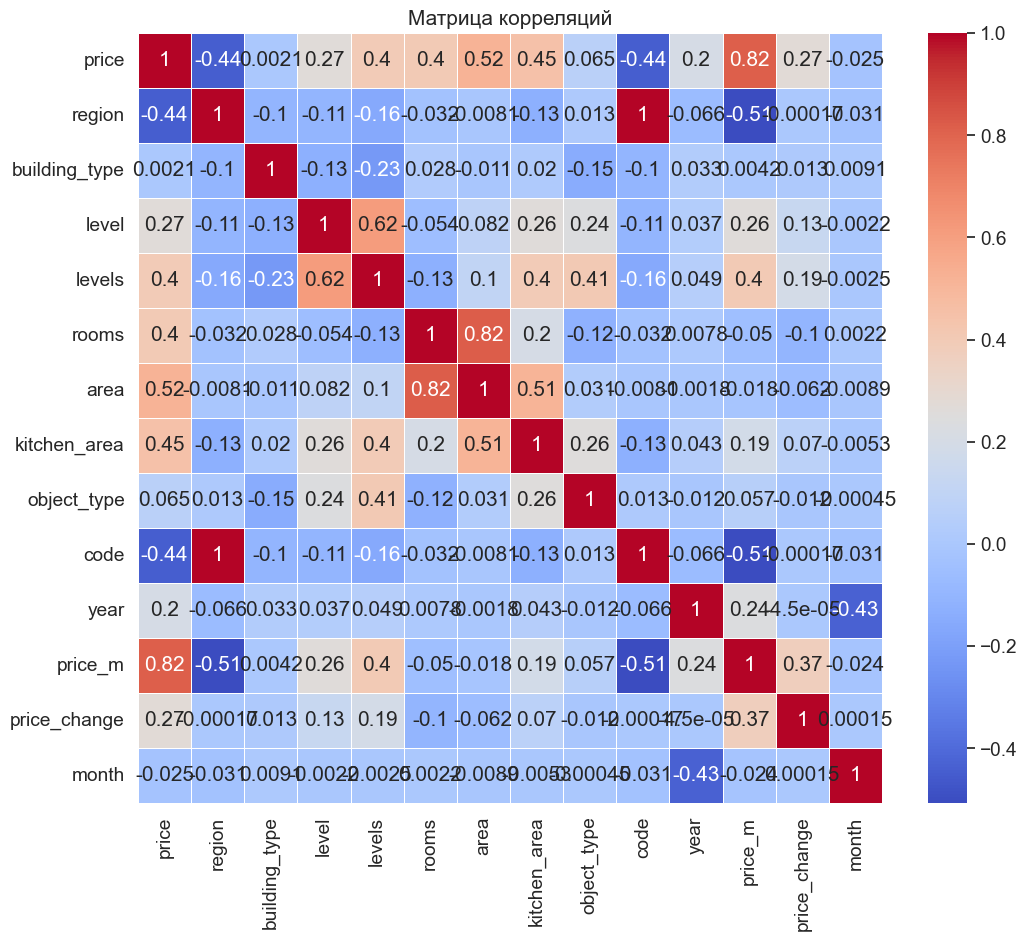

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = good_df.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

Видно, что больше всего на цену влияют: количество этажей в здании, количество комнат, площадь квартиры и площадь кухни

Оставим в датасете только нужные столбцы и снова построим матрицу корреляций

In [123]:
columns = ['price', 'levels', 'rooms', 'area', 'kitchen_area']
new_df = good_df.loc[:, columns]

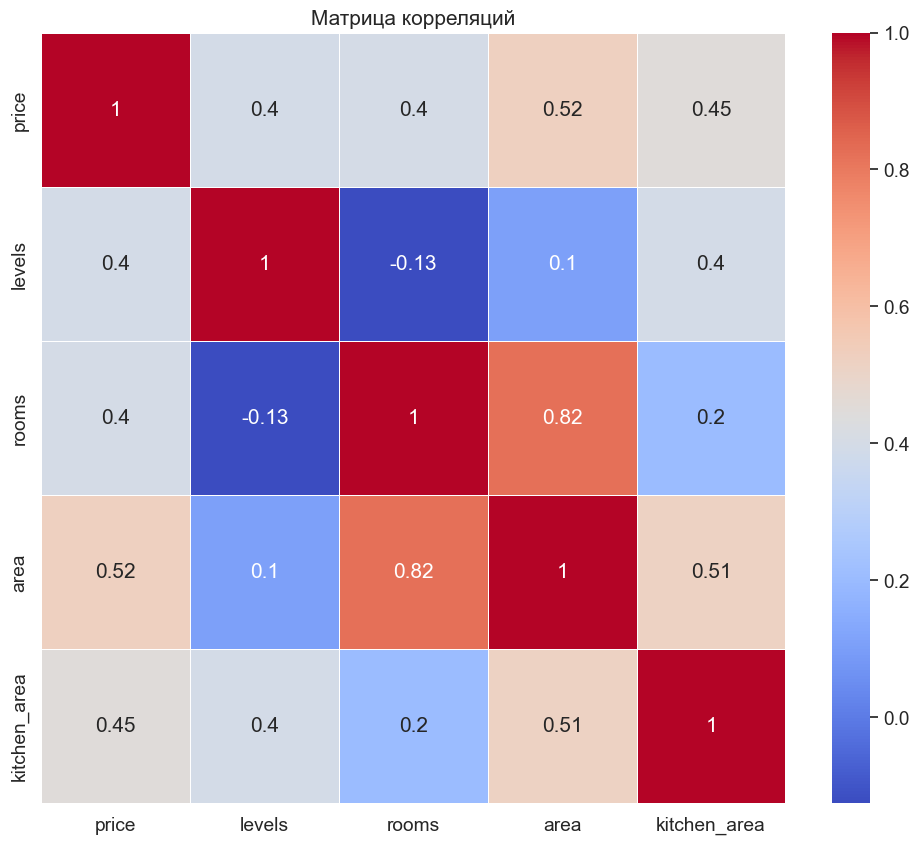

In [124]:
correlation_matrix_1 = new_df.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций')
plt.show()

Мы видим, что площадь квартиры и количество комнат - коллинеарные факторы. При этои площадь квартиры сильнее коррелирует с признаком-результатом, чем количество комнат. Однако мы не будем исключать этот фактор из модели, а воспользуемся регуляризацией

In [ ]:
sns.pairplot(new_df)

In [126]:
x = new_df[['levels', 'rooms', 'area', 'kitchen_area']] 
y = new_df['price']

Разделим данные на обучающую и тестовую выборки

In [127]:
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn. model_selection import RepeatedKFold

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

Стандартизуем данные 

In [129]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

Далее построим модель Lasso Regression

In [130]:
from numpy import arange
from sklearn.linear_model import LassoCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LassoCV(alphas=arange(0, 1, 0.01))
model.fit(x_train, y_train)

C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]))

In [131]:
print(model.alpha_)

0.0


In [136]:
y_pred = model.predict(x_test) 
y_pred

array([3.09525289, 6.08104324, 6.1518277 , ..., 4.1855458 , 1.82381385,
       4.65576343])

In [138]:
import math
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print(f'MAPE: {mape}')

MSE: 9.186629262976371
MAE: 1.7616052956471036
RMSE: 3.0309452754836026
MAPE: 5.484606971773628


Показатели модели не очень хорошие, посмотрим, что будет при использовании другого вида регуляризации

Далее построим модель Ridge Regression

In [143]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas=arange(0.1, 1, 10), scoring='neg_mean_absolute_error')
model.fit(x_train, y_train)

RidgeCV(alphas=array([0.1]), scoring='neg_mean_absolute_error')

In [144]:
print(model.alpha_)

0.1


In [145]:
y_pred = model.predict(x_test) 
y_pred

array([3.10309249, 6.06263619, 6.13521071, ..., 4.19302205, 1.8398479 ,
       4.67020222])

In [146]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print(f'MAPE: {mape}')

MSE: 9.182065242953248
MAE: 1.7604297154877533
RMSE: 3.030192278214907
MAPE: 5.504536797710568


Итак, мы видим, что для обеих моделей показатели очень плохие. Это связано с тем, что связь нелинейная